### 텍스트 길이 분석
- 각 에세이 데이터의 텍스트 길이를 비교

### 비교 결과
- 아무래도 에세이를 작성할 때, 글자 수가 정해져 있을 수 있다보니 전체적으로 텍스트의 길이는 비슷했다.

### 전처리 안한 버전

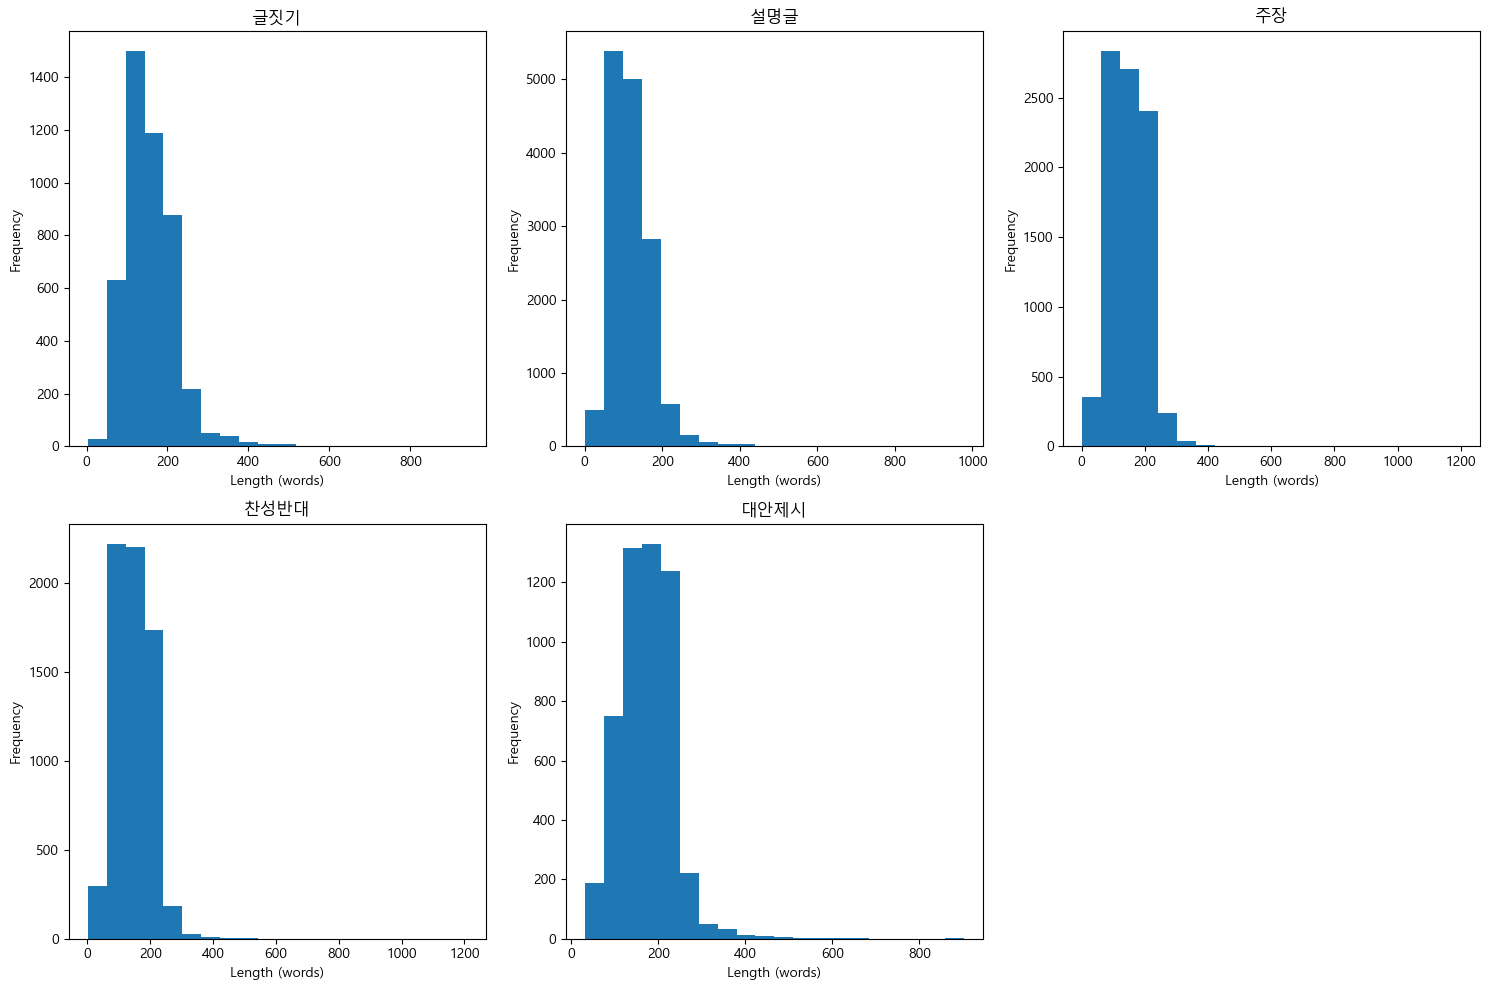

In [1]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글을 도표 위에 출력하기 위한 폰트 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 'malgun.ttf' 파일의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_prop

# 전체 에세이 데이터의 텍스트 길이를 저장할 리스트
all_text_lengths = []

folder_list = ['./글짓기', './설명글', './주장', './찬성반대', './대안제시']

# 서브플롯을 위한 설정 (2행 3열)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# 행과 열을 인덱스로 사용하기 위한 카운터
row, col = 0, 0


# 전체 5개 폴더에 대해서 json 파일을 읽어와 보여주기
for folder_path in folder_list:
    
    # 각 카테고리 별 텍스트 길이를 저장할 리스트
    text_lengths = []
    
    # 폴더 내의 모든 JSON 파일을 순회(끝에가 .json인 파일들)
    for file in os.listdir(folder_path):
        if file.endswith('.json'):
            with open(os.path.join(folder_path, file), 'r', encoding='utf-8') as f:
                data = json.load(f)
                # 텍스트 추출 
                text = data['essay_txt']
                
                
                # 텍스트 길이 계산
                length = len(text.split())  # 단어 수 기준
                text_lengths.append(length)

    all_text_lengths.append(text_lengths)
    
    # 개별 카테고리별 히스토그램
    # 특정 길이 범위에 얼마만큼의 에세이가 속해있는지 확인
    # 해당 위치에 히스토그램 그리기
    axes[row, col].hist(text_lengths, bins=20)
    axes[row, col].set_title(f'{os.path.basename(folder_path)}')
    axes[row, col].set_xlabel('Length (words)')
    axes[row, col].set_ylabel('Frequency (essay count)')

    col += 1
    if col > 2:
        row += 1
        col = 0

# 마지막 (불필요한) 서브플롯 숨기기
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 전처리를 수행한 버전

In [1]:
# 전처리 함수
def preprocess_text(text):
    # 소문자 변환
    text = text.lower()
    
    # 문장 구분 제거
    text = re.sub(r'#@문장구분#', '', text)
    
    # 특수 문자 제거
    text = re.sub(r'[^가-힣a-zA-Z0-9 ]', '', text)
    
    # 단어 단위로 분리
    words = text.split()
    
    return ' '.join(words)

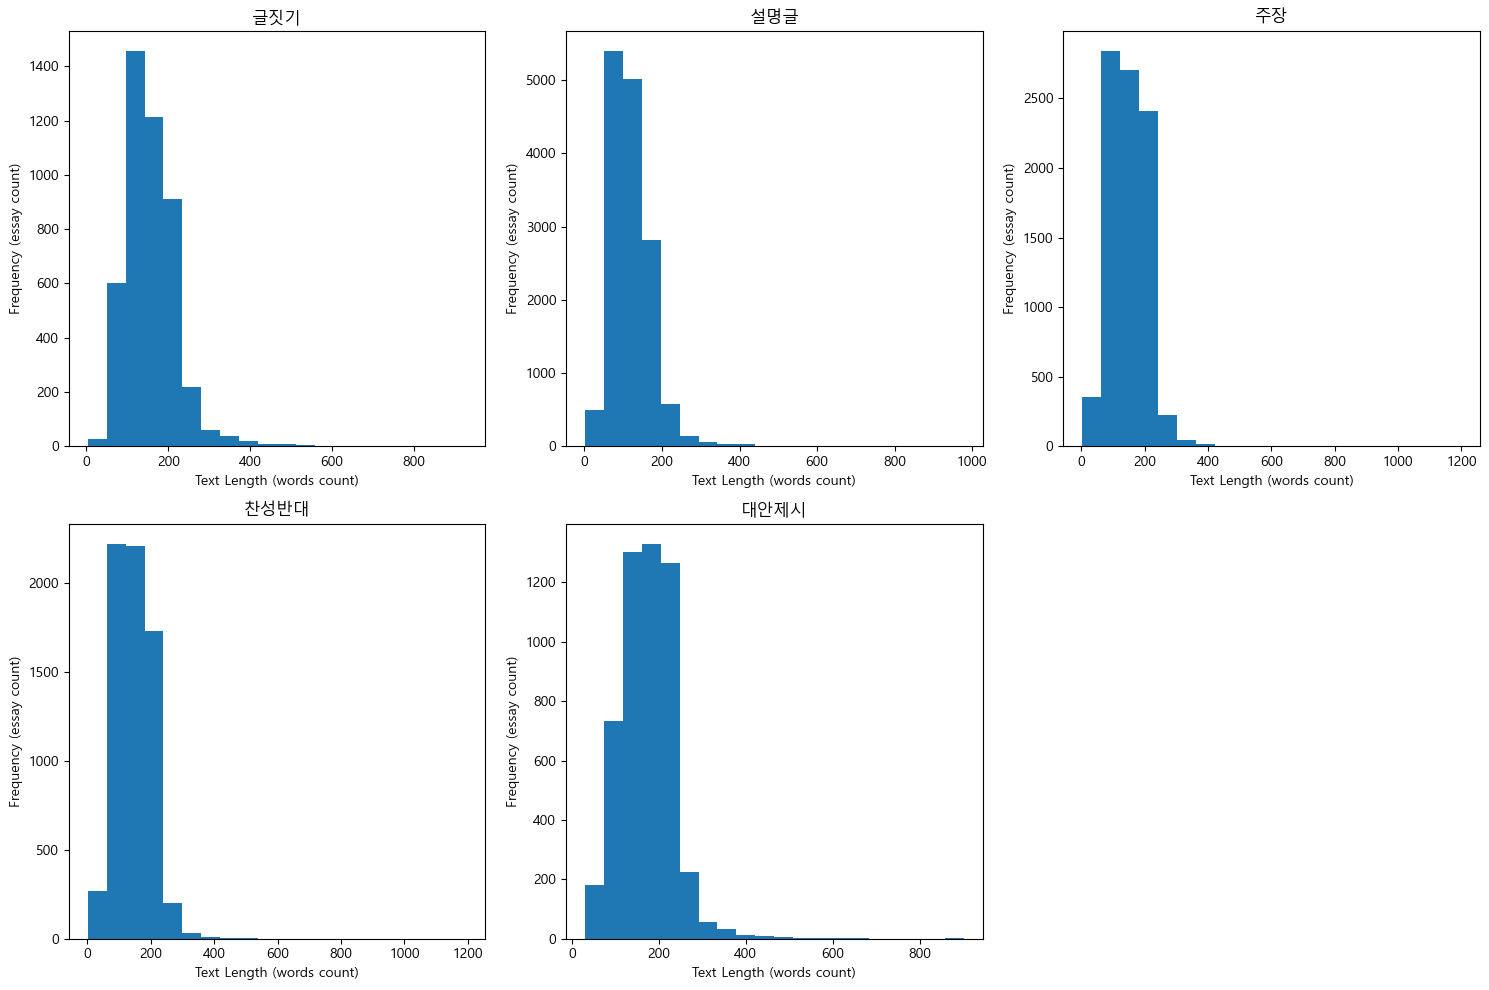

In [2]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re

# 한글을 도표 위에 출력하기 위한 폰트 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 'malgun.ttf' 파일의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_prop

# 전체 에세이 데이터의 텍스트 길이를 저장할 리스트
all_text_lengths = []

folder_list = ['./글짓기', './설명글', './주장', './찬성반대', './대안제시']

# 서브플롯을 위한 설정 (2행 3열)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# 행과 열을 인덱스로 사용하기 위한 카운터
row, col = 0, 0


# 전체 5개 폴더에 대해서 json 파일을 읽어와 보여주기
for folder_path in folder_list:
    
    # 각 카테고리 별 텍스트 길이를 저장할 리스트
    text_lengths = []
    
    # 폴더 내의 모든 JSON 파일을 순회(끝에가 .json인 파일들)
    for file in os.listdir(folder_path):
        if file.endswith('.json'):
            with open(os.path.join(folder_path, file), 'r', encoding='utf-8') as f:
                data = json.load(f)
                # 텍스트 추출 
                text = data['essay_txt']
                
                # 전처리
                text = preprocess_text(text)
                
                # 텍스트 길이 계산
                length = len(text.split())  # 단어 수 기준
                text_lengths.append(length)

    all_text_lengths.append(text_lengths)
    
    # 개별 카테고리별 히스토그램
    # 특정 길이 범위에 얼마만큼의 에세이가 속해있는지 확인
    # 해당 위치에 히스토그램 그리기
    axes[row, col].hist(text_lengths, bins=20)
    axes[row, col].set_title(f'{os.path.basename(folder_path)}')
    axes[row, col].set_xlabel('Text Length (words count)')
    axes[row, col].set_ylabel('Frequency (essay count)')

    col += 1
    if col > 2:
        row += 1
        col = 0

# 마지막 (불필요한) 서브플롯 숨기기
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 라벨링 데이터를 가지고 길이를 측정한 버전

C:\Users\jinsoo\AppData\Local\Temp\ipykernel_19564\2939388467.py:53: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


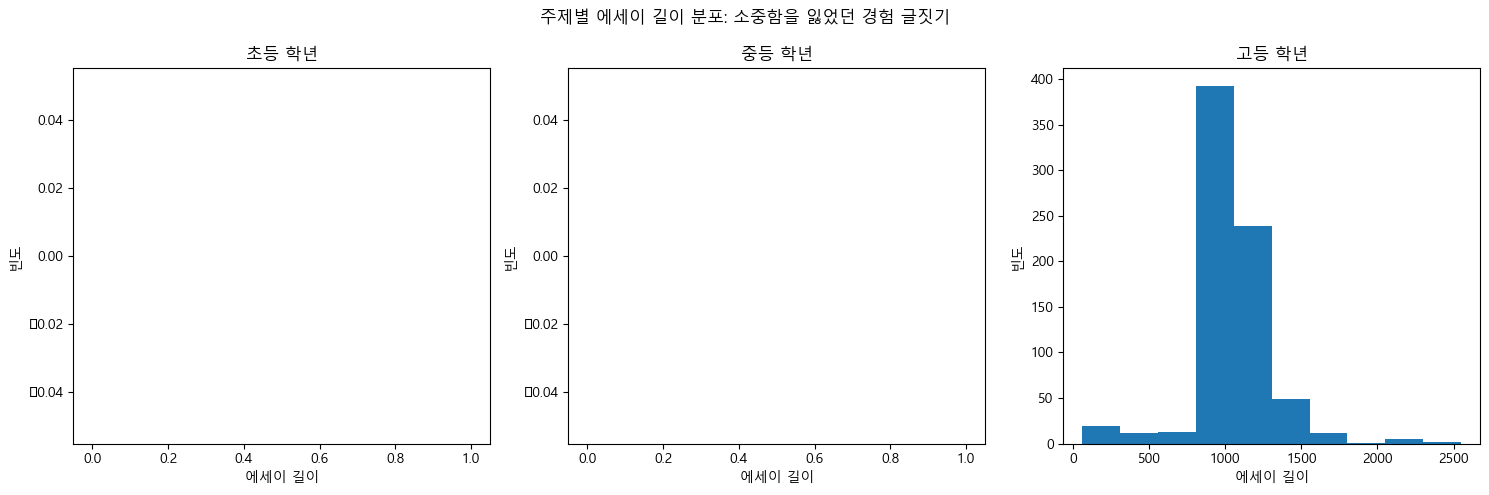

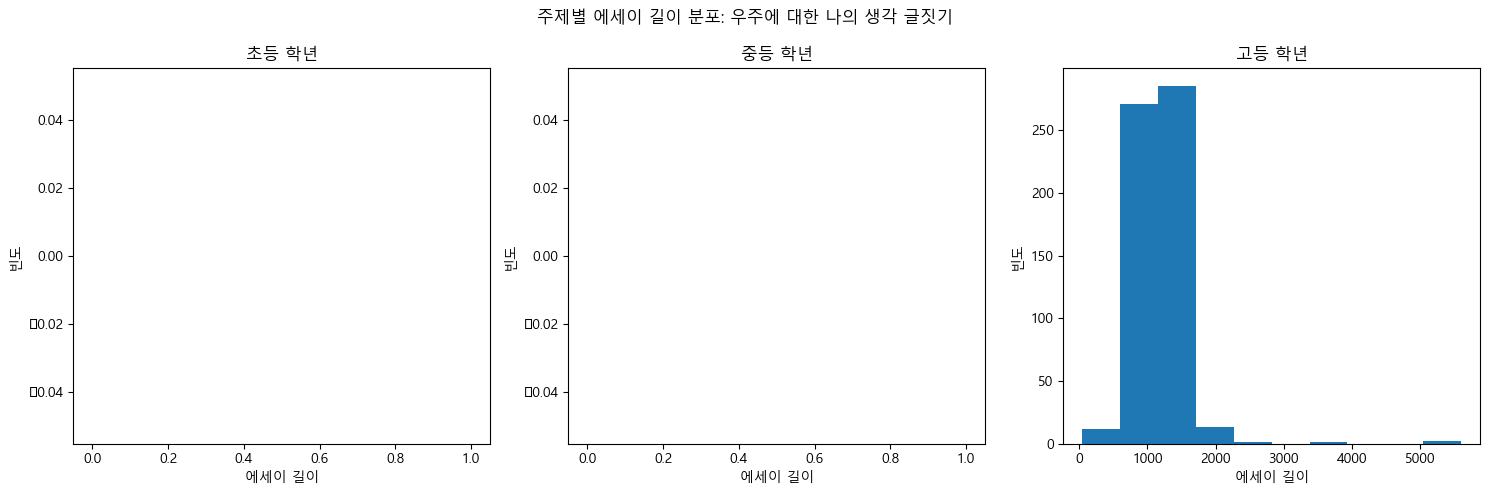

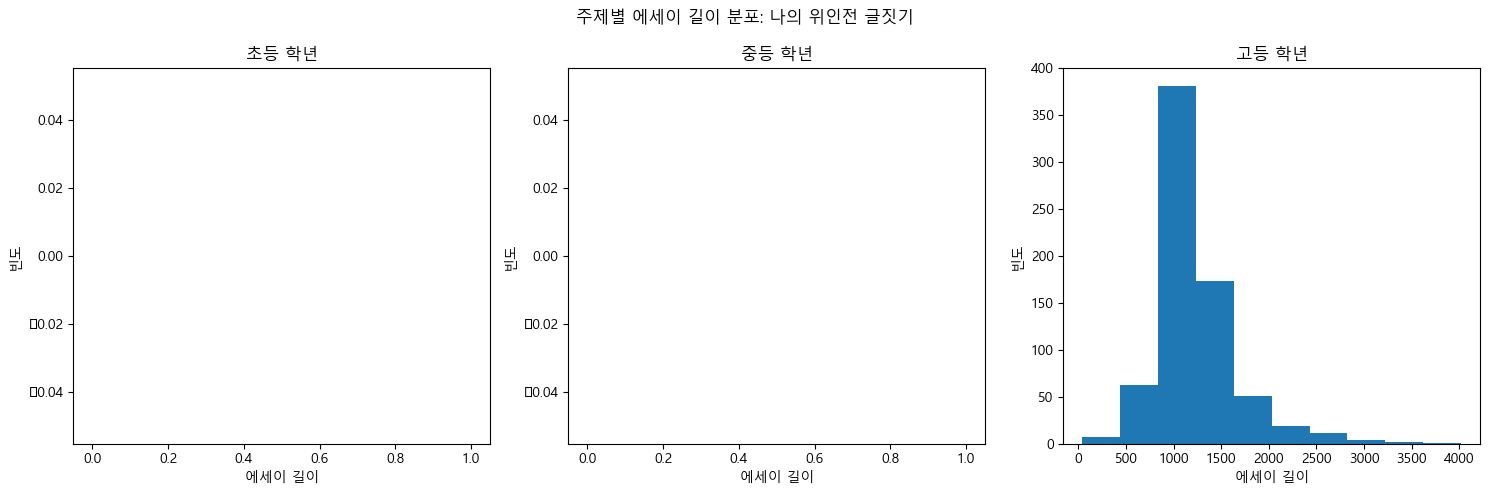

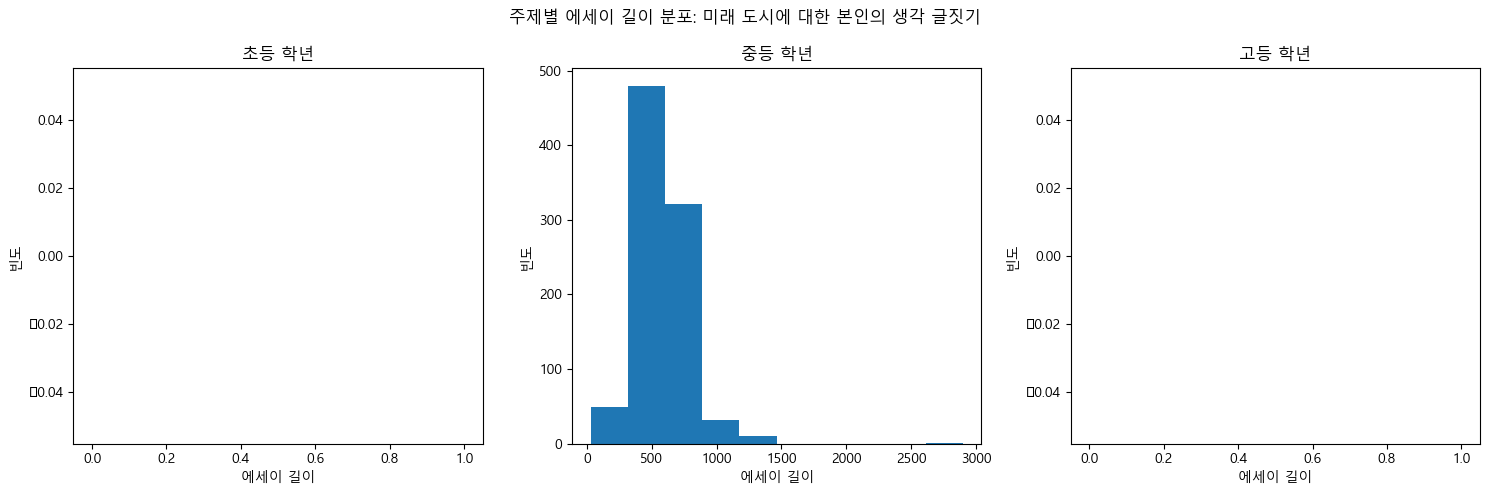

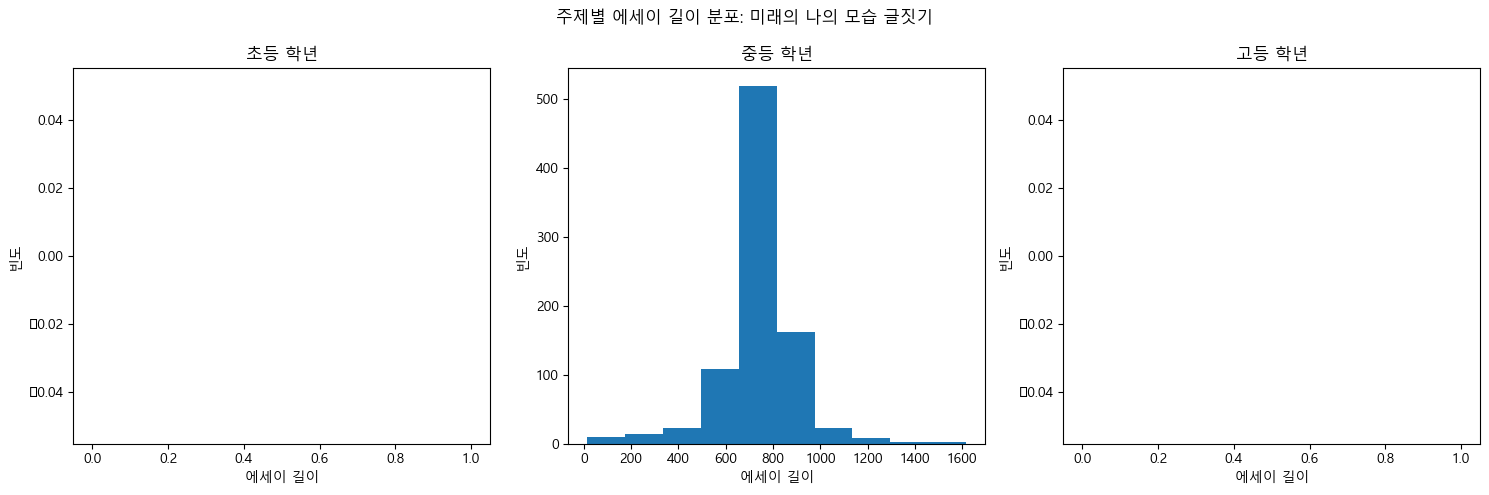

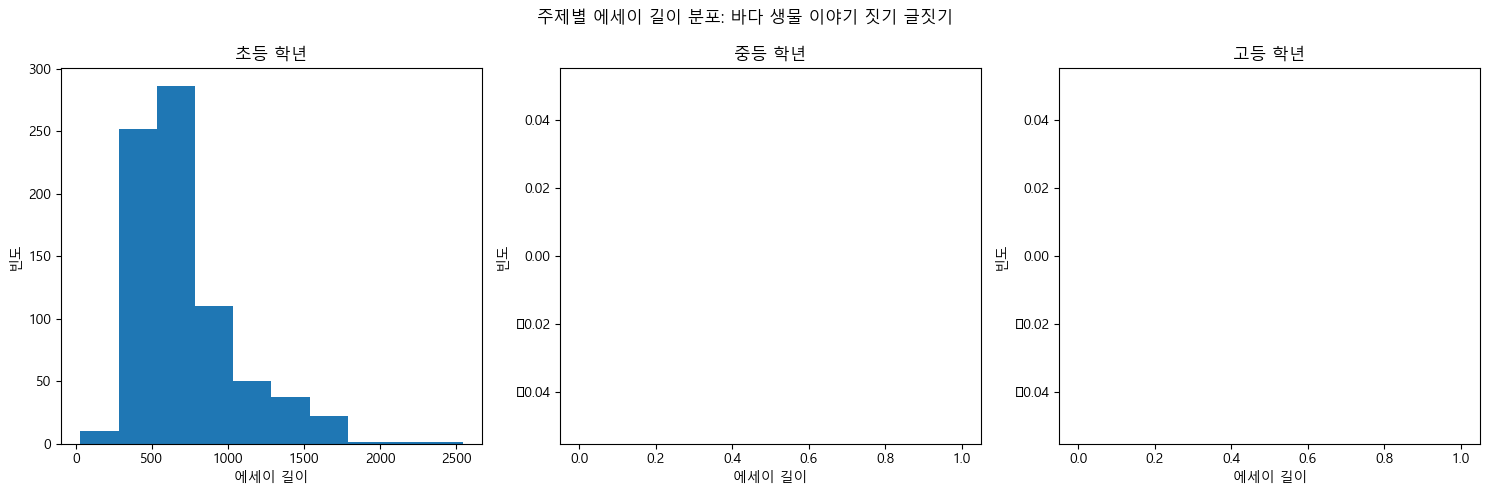

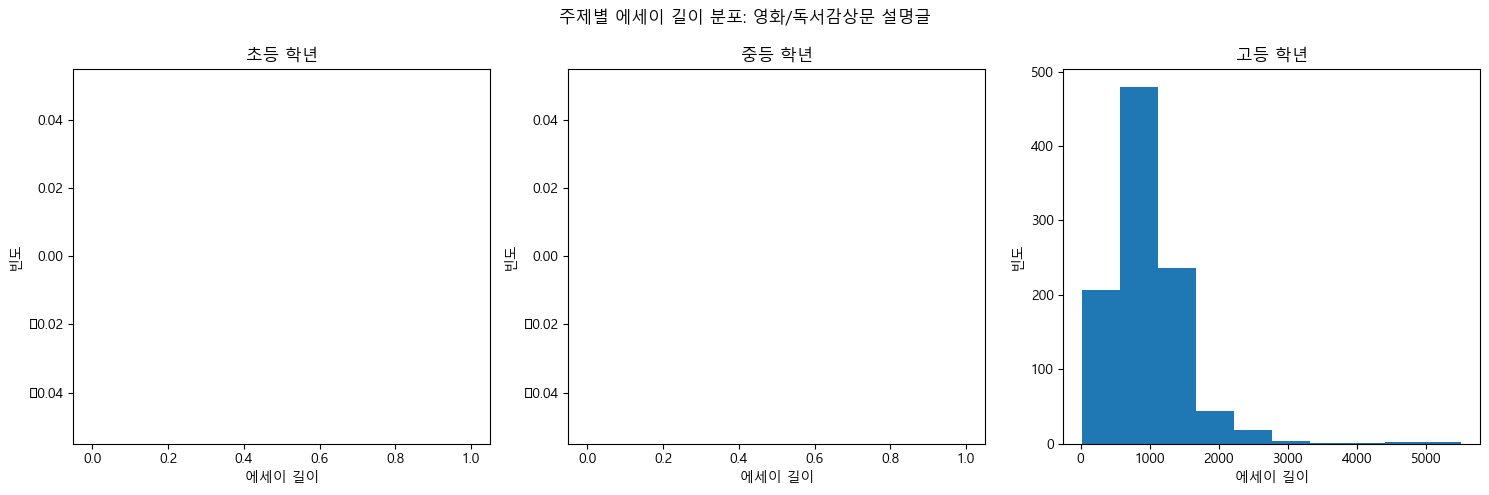

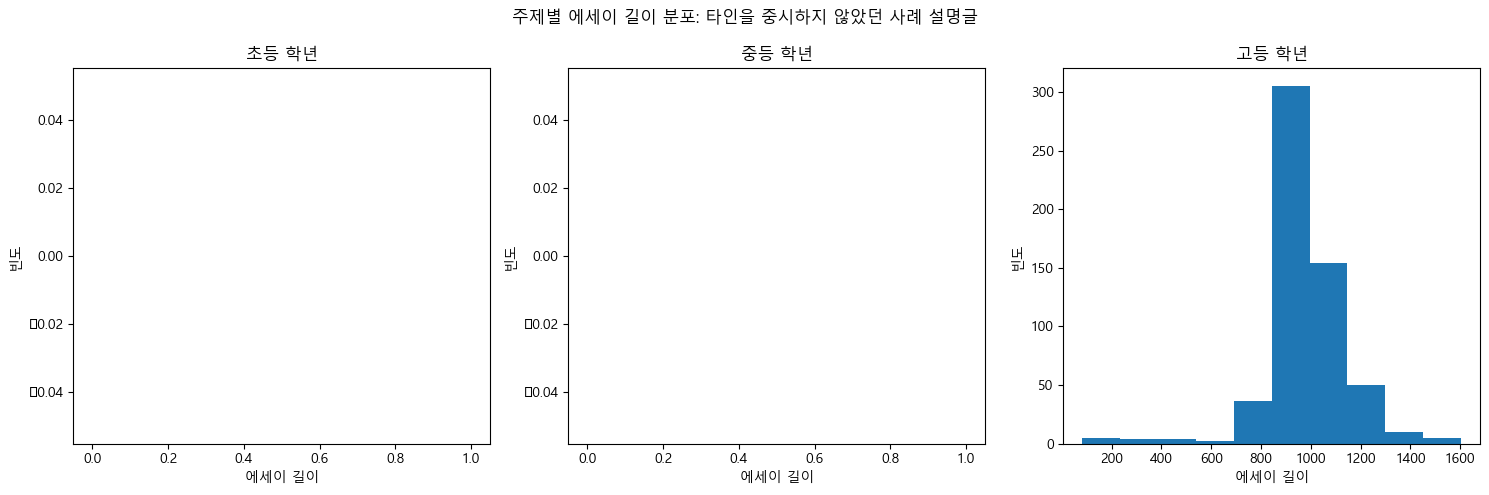

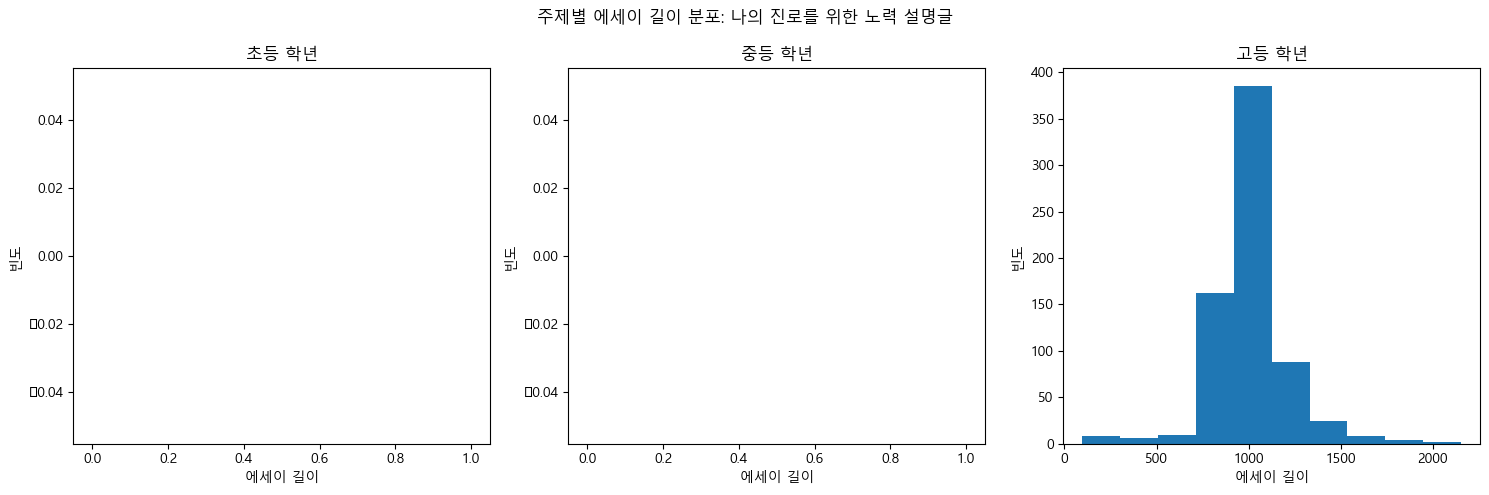

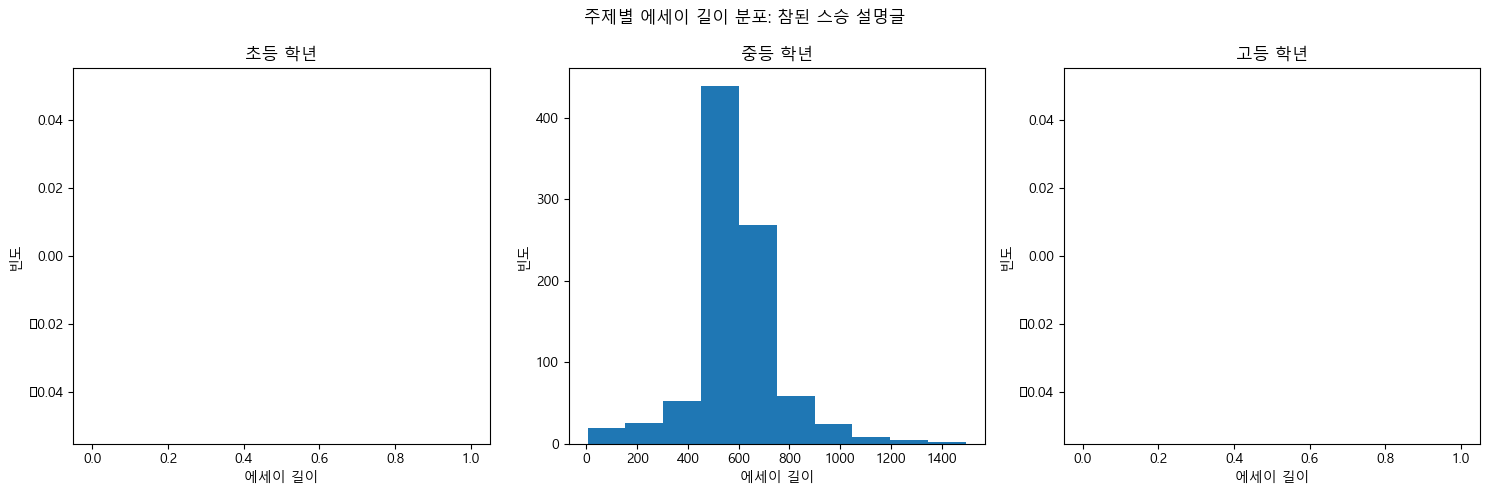

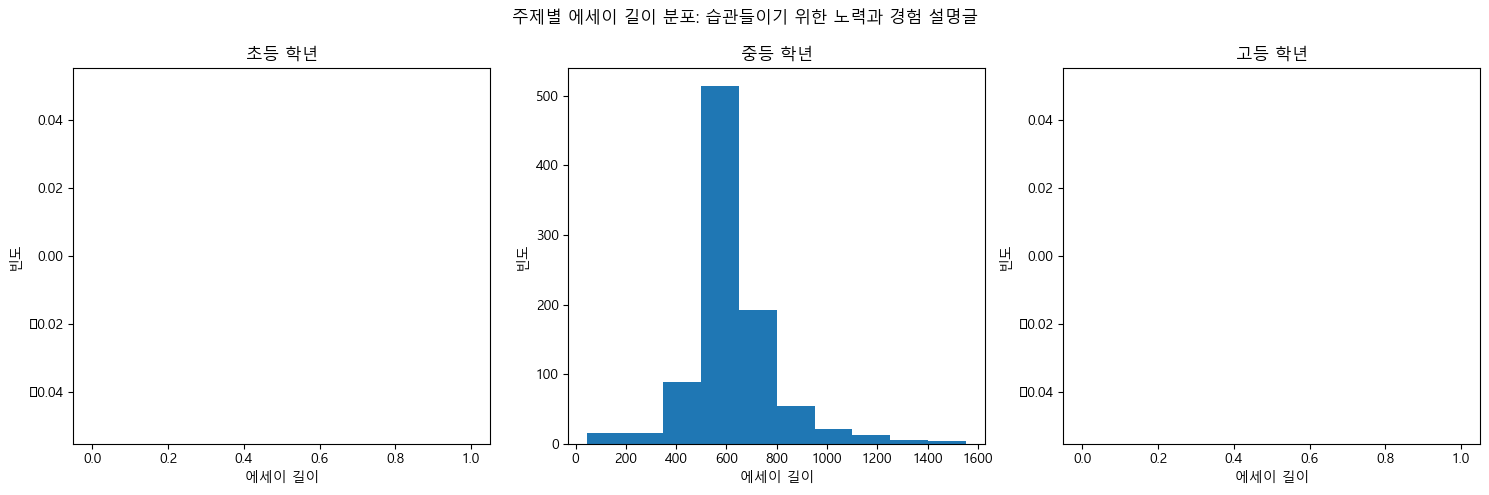

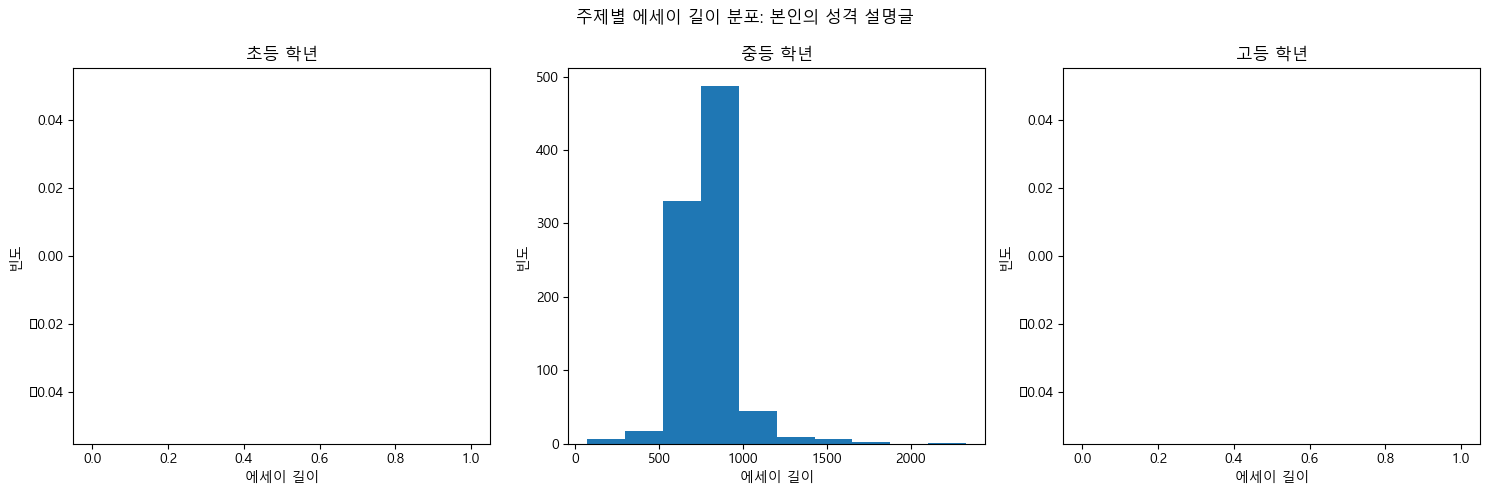

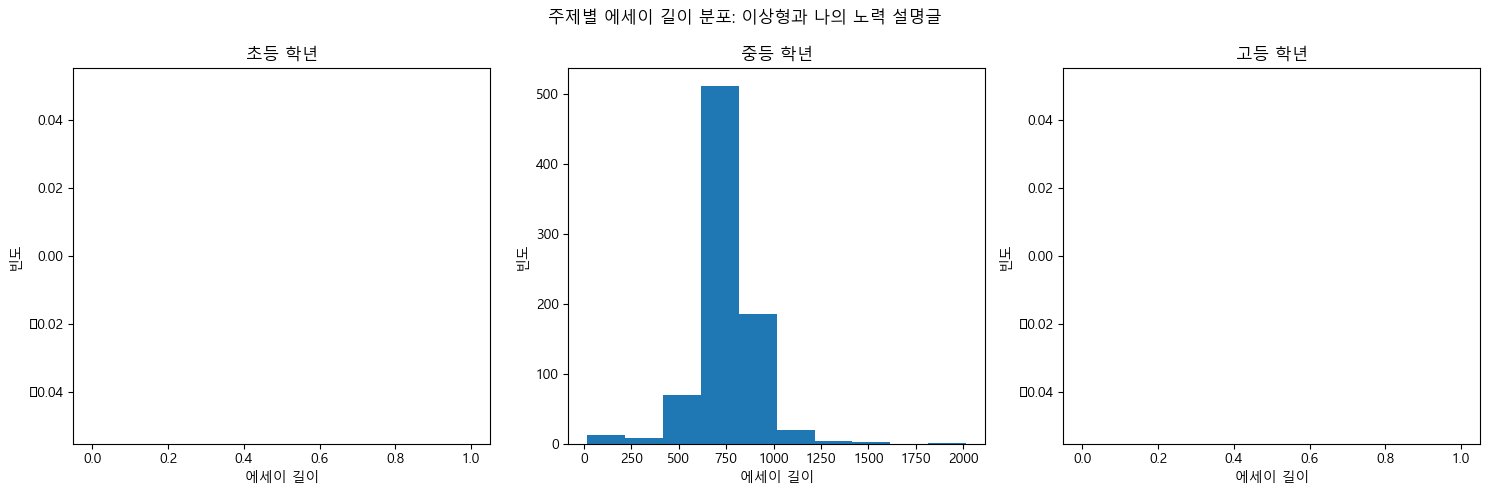

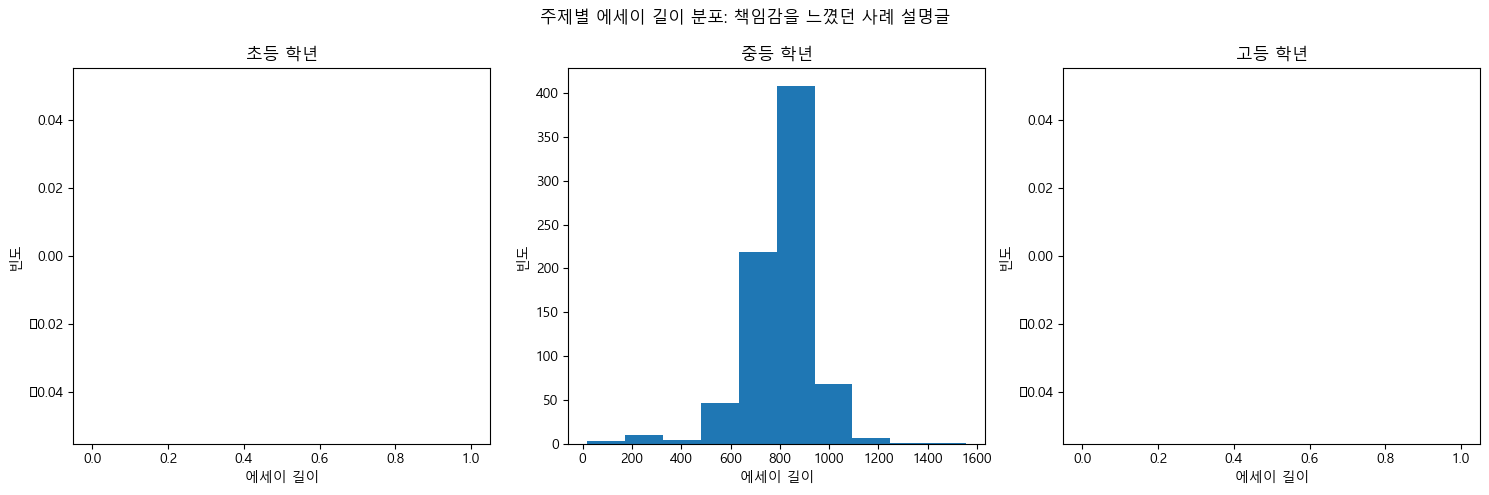

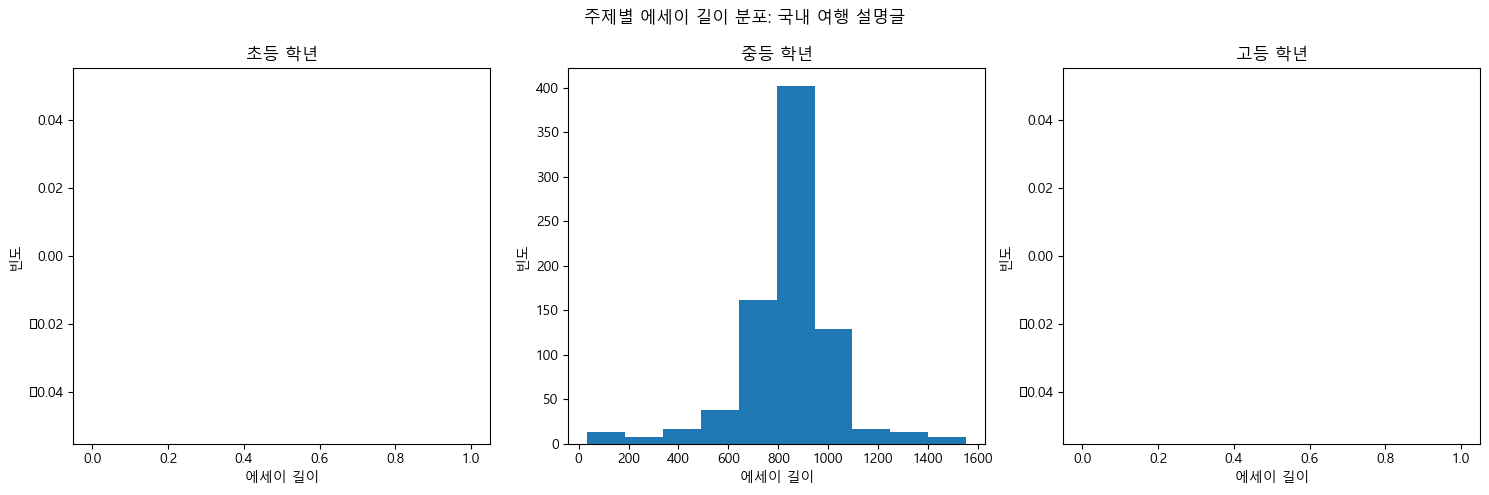

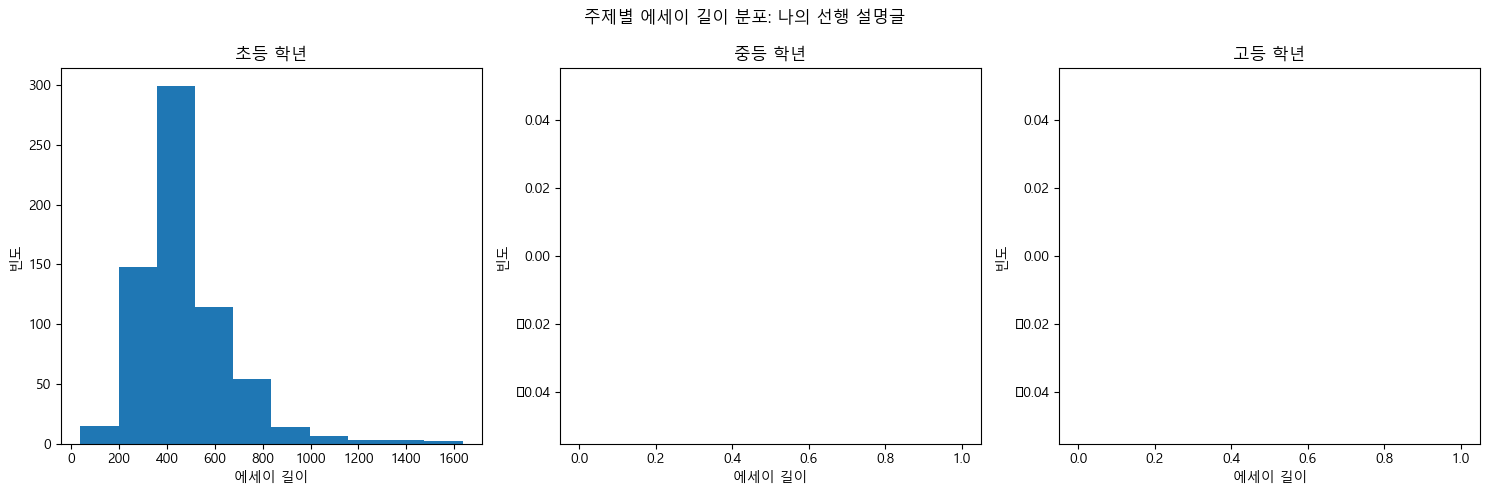

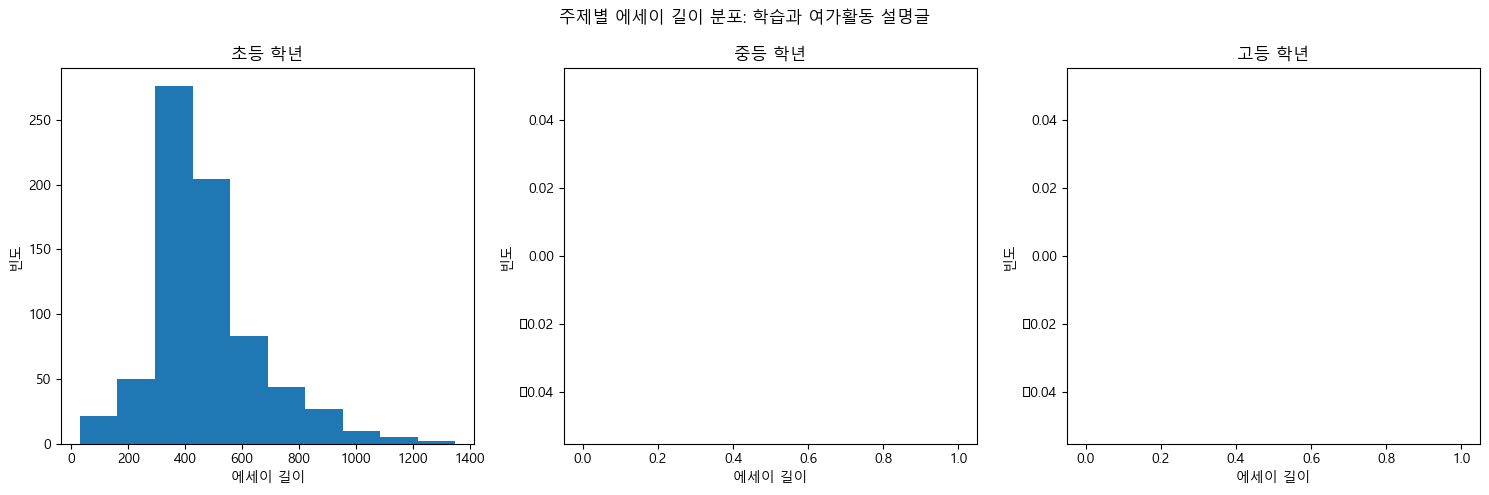

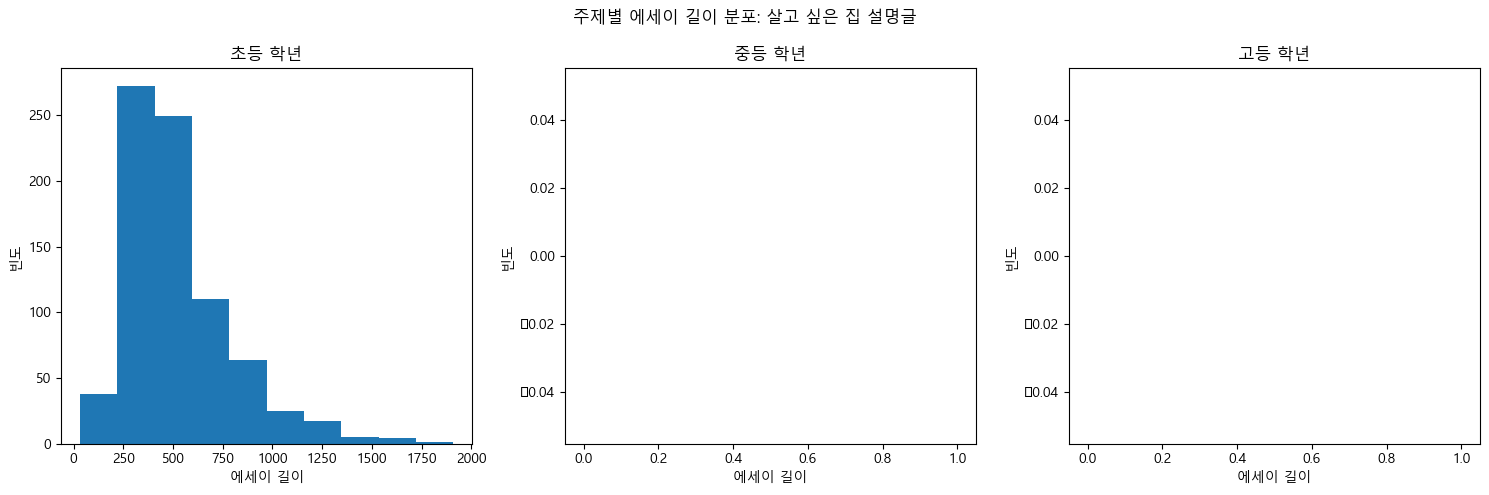

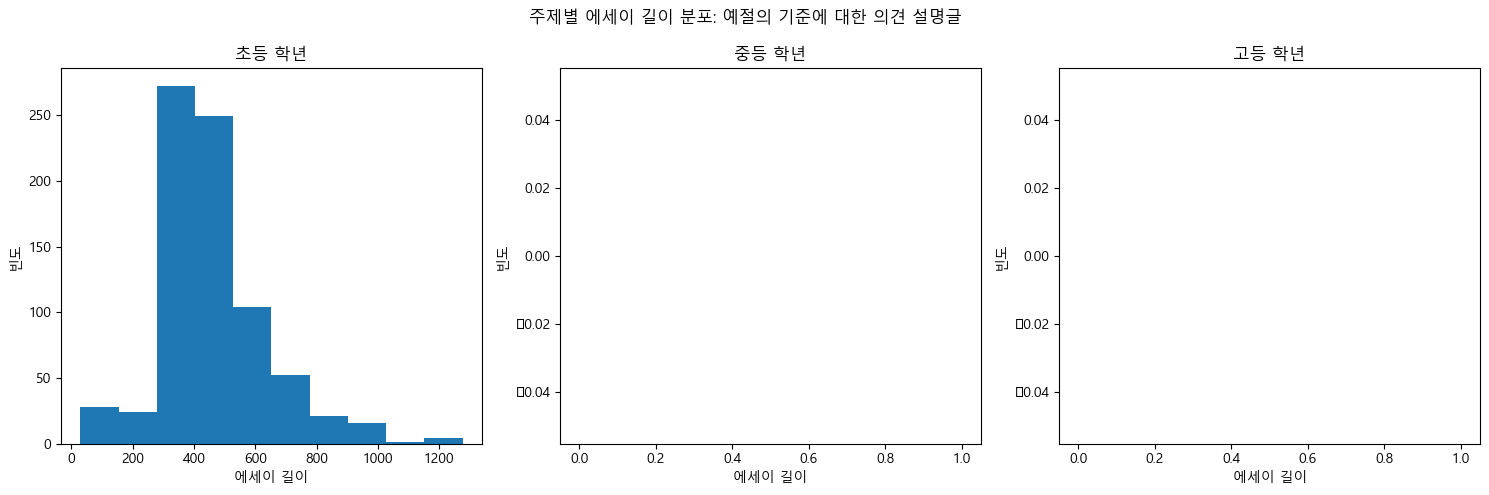

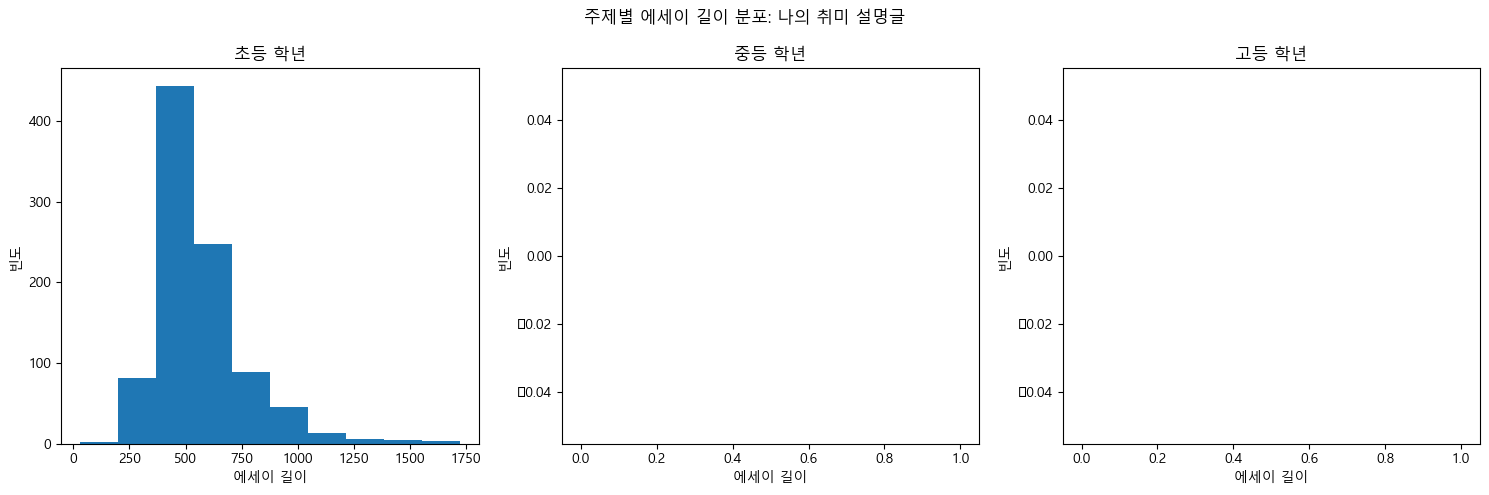

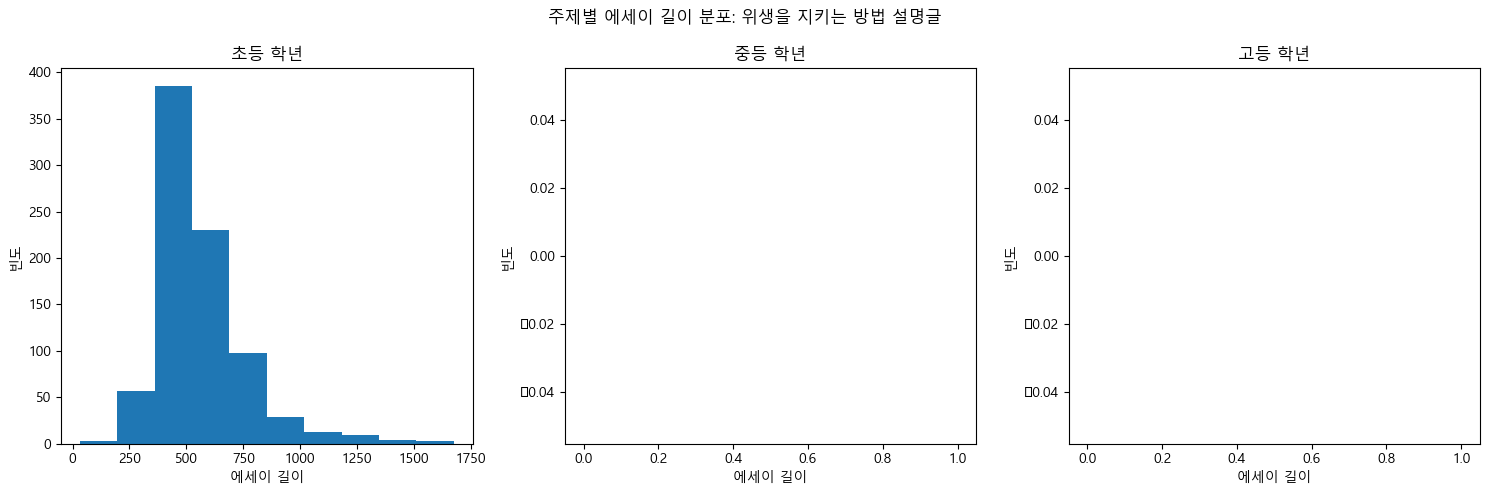

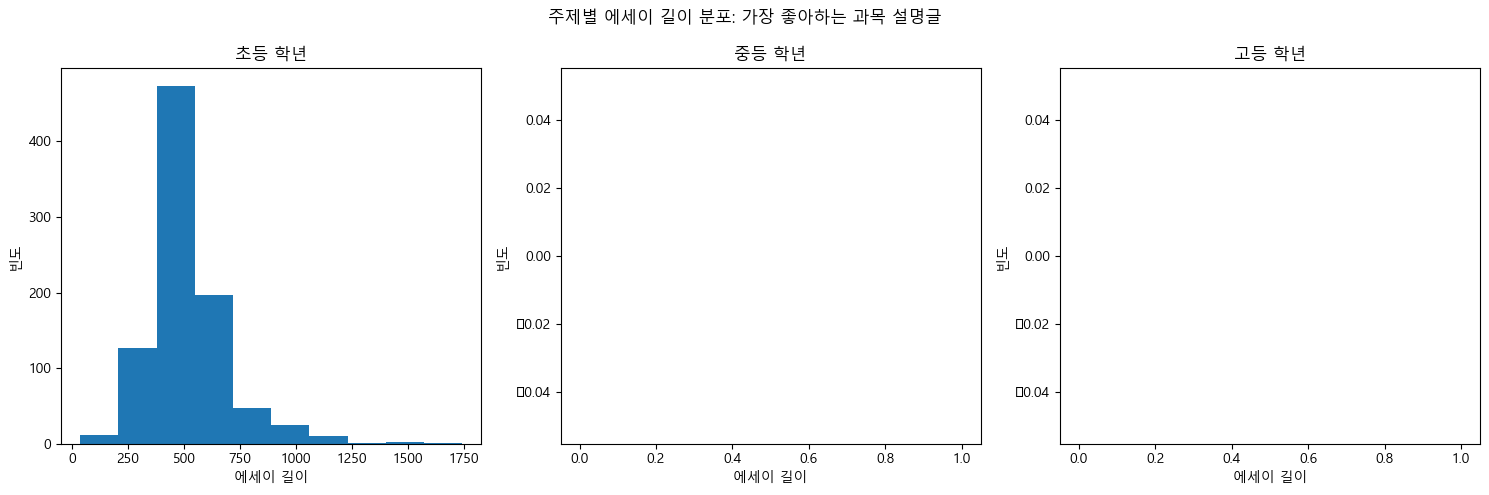

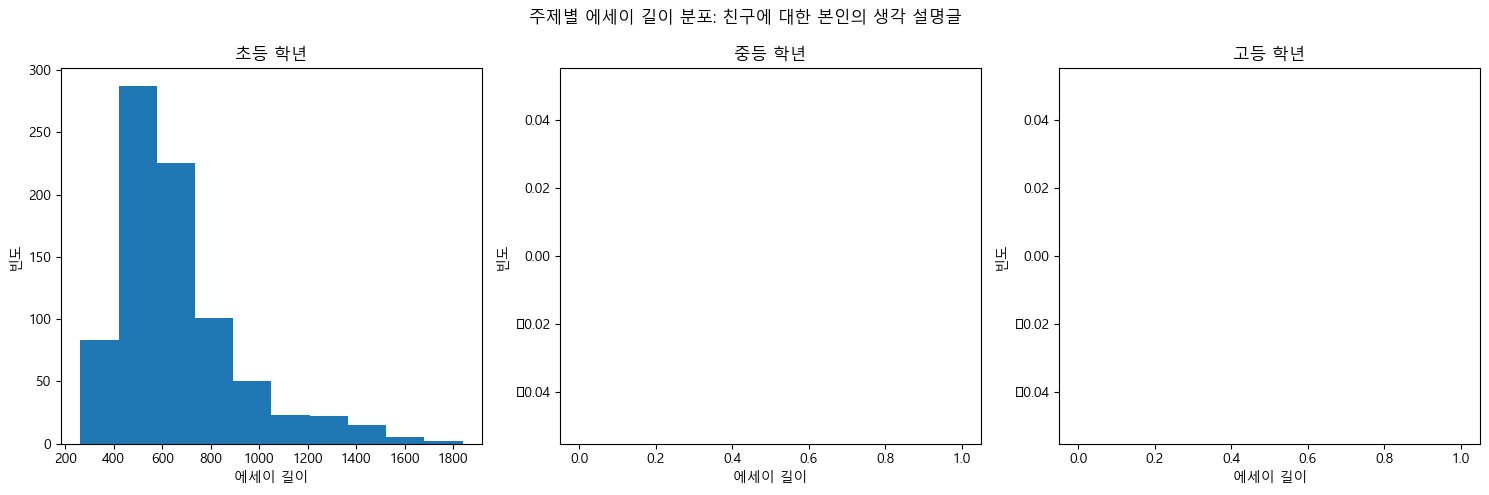

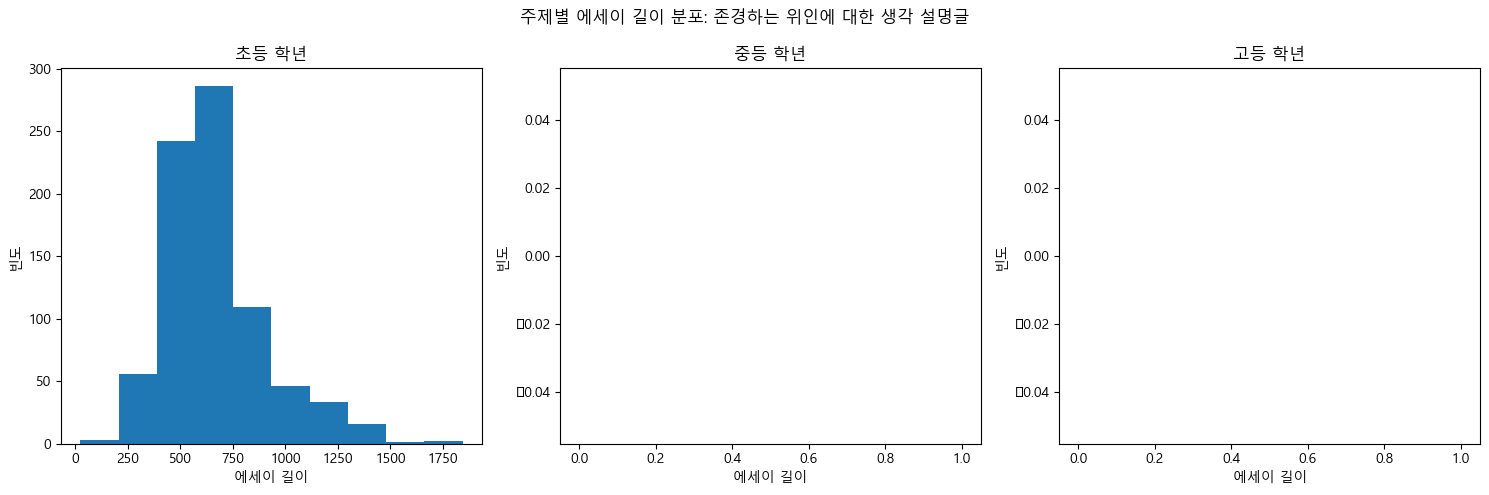

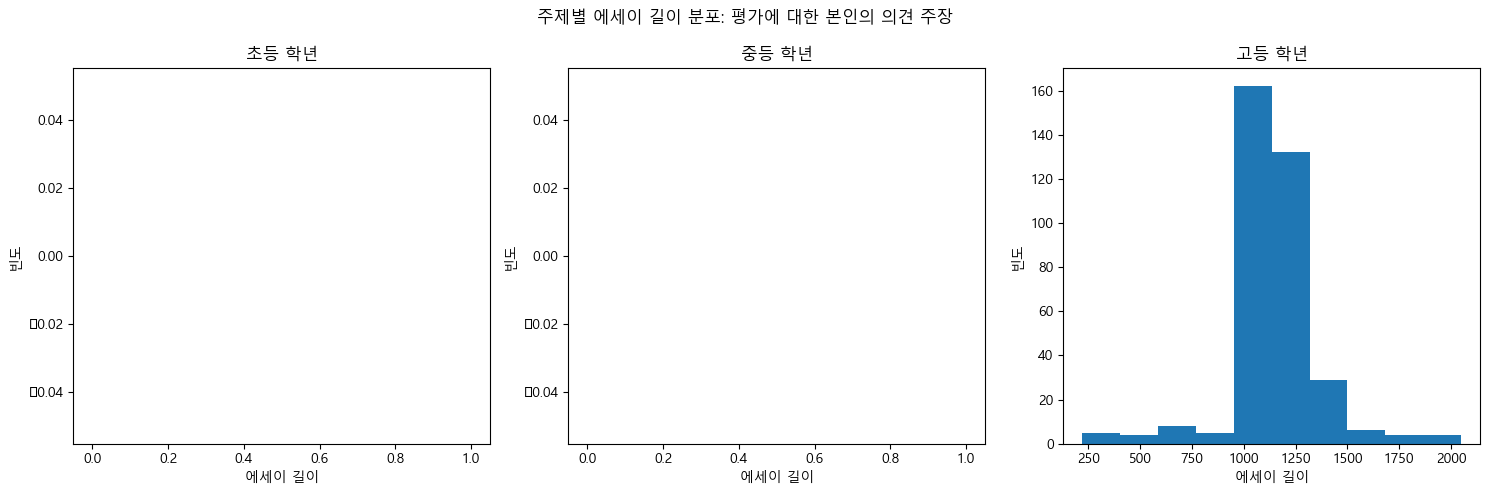

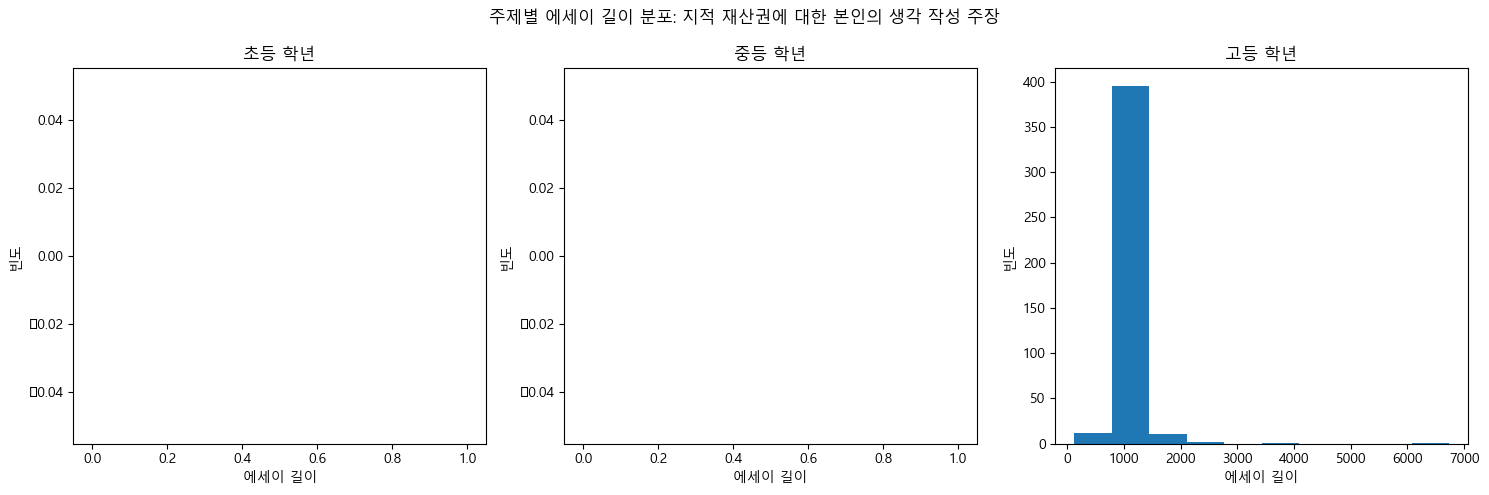

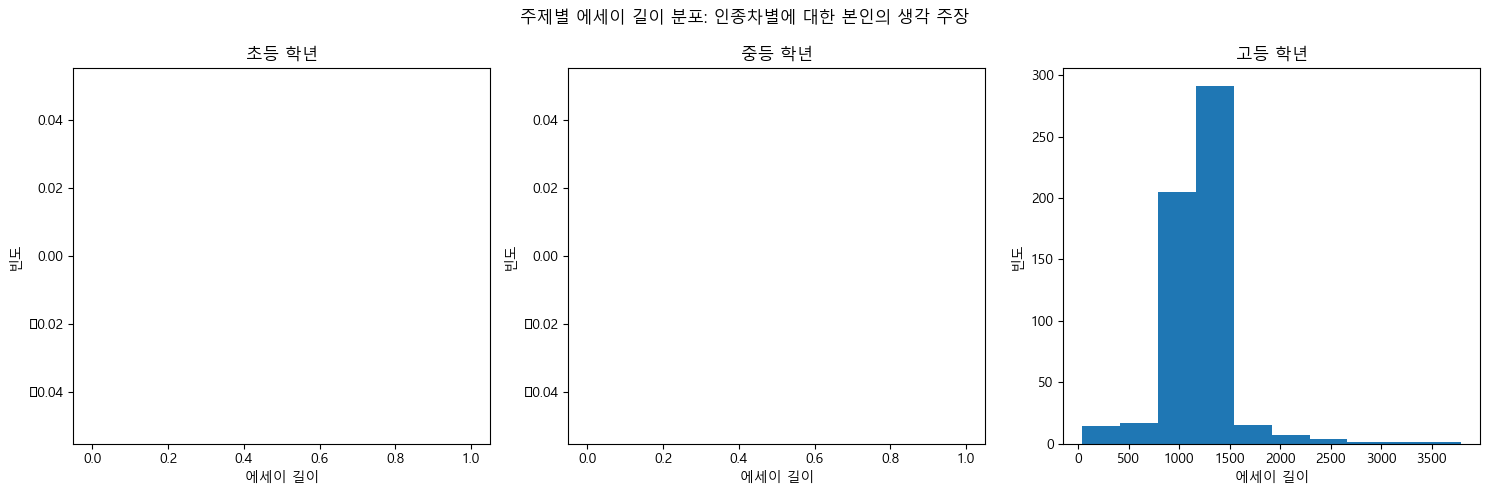

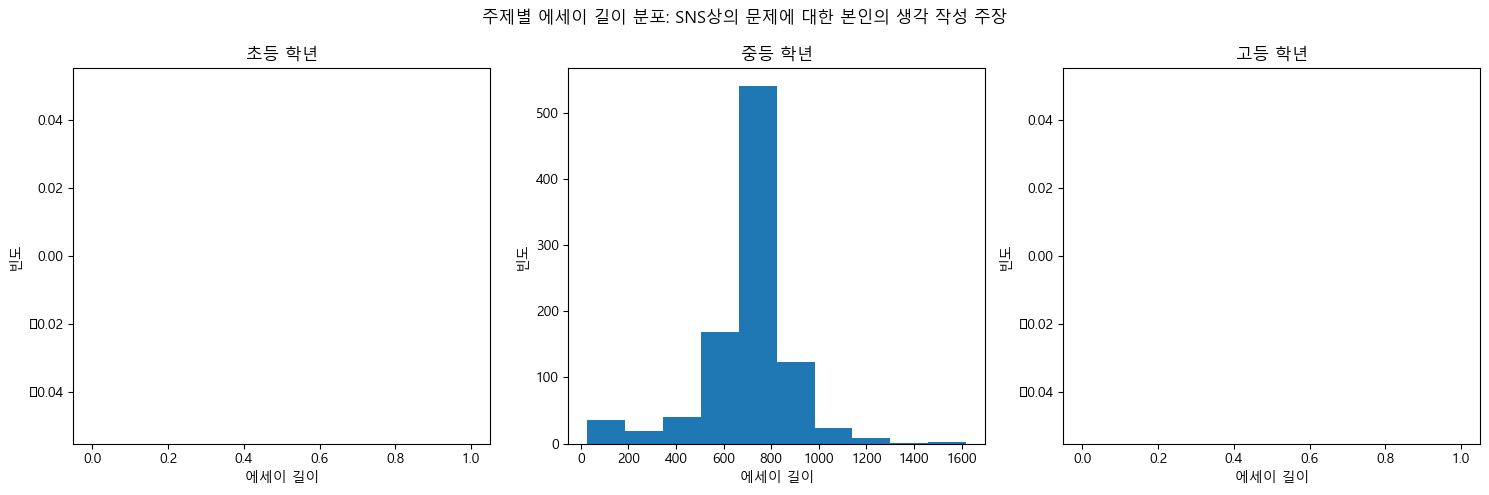

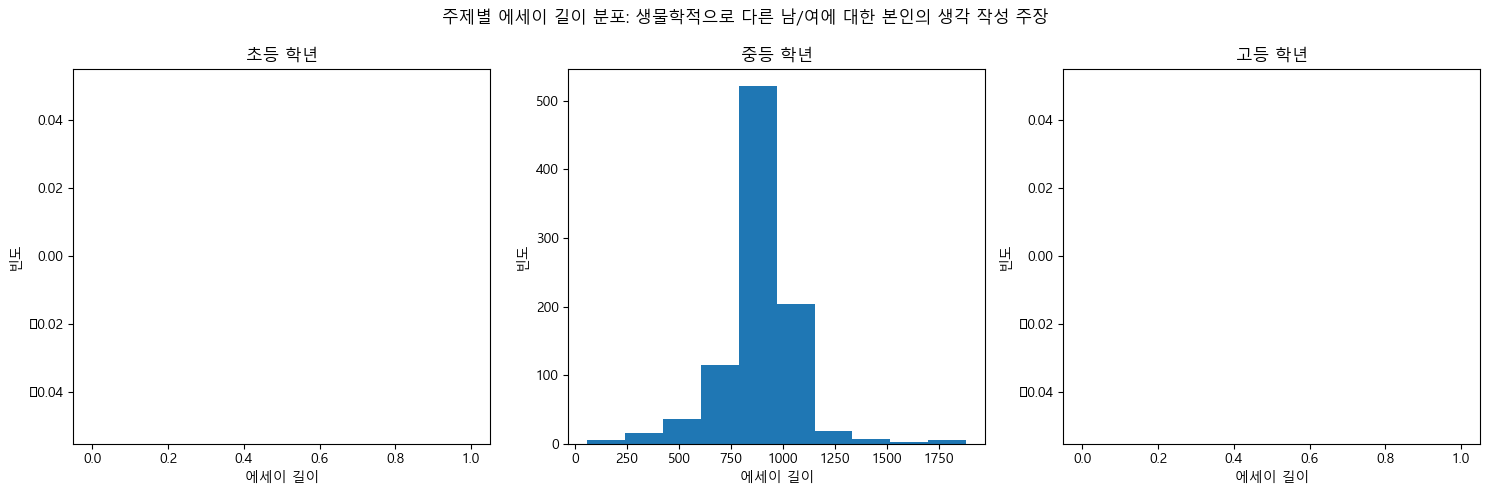

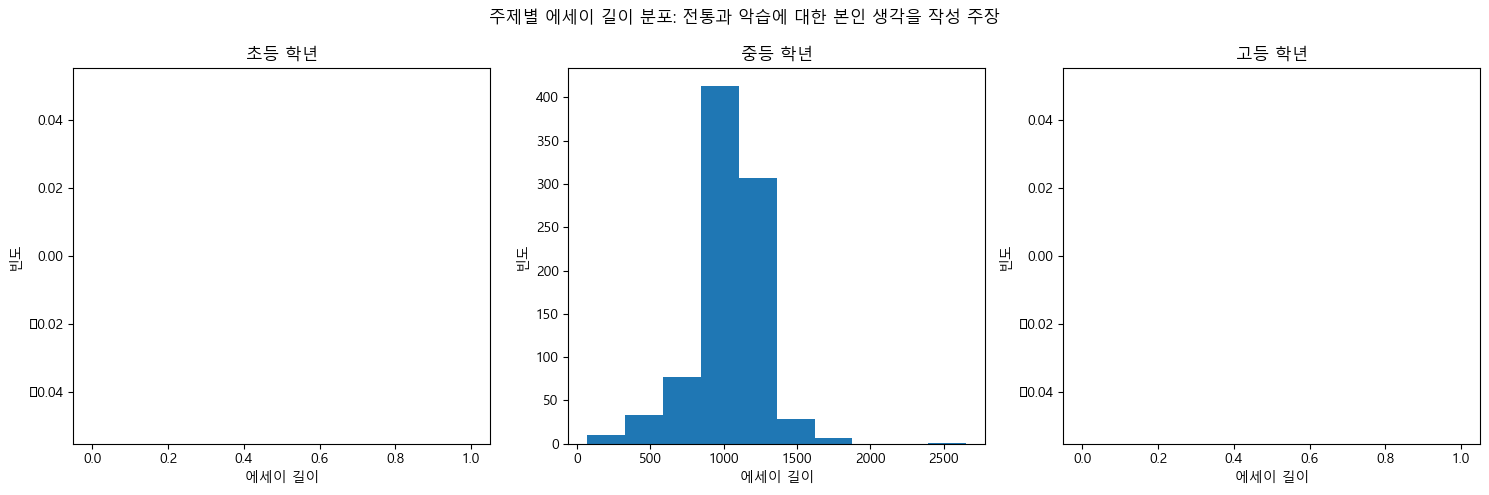

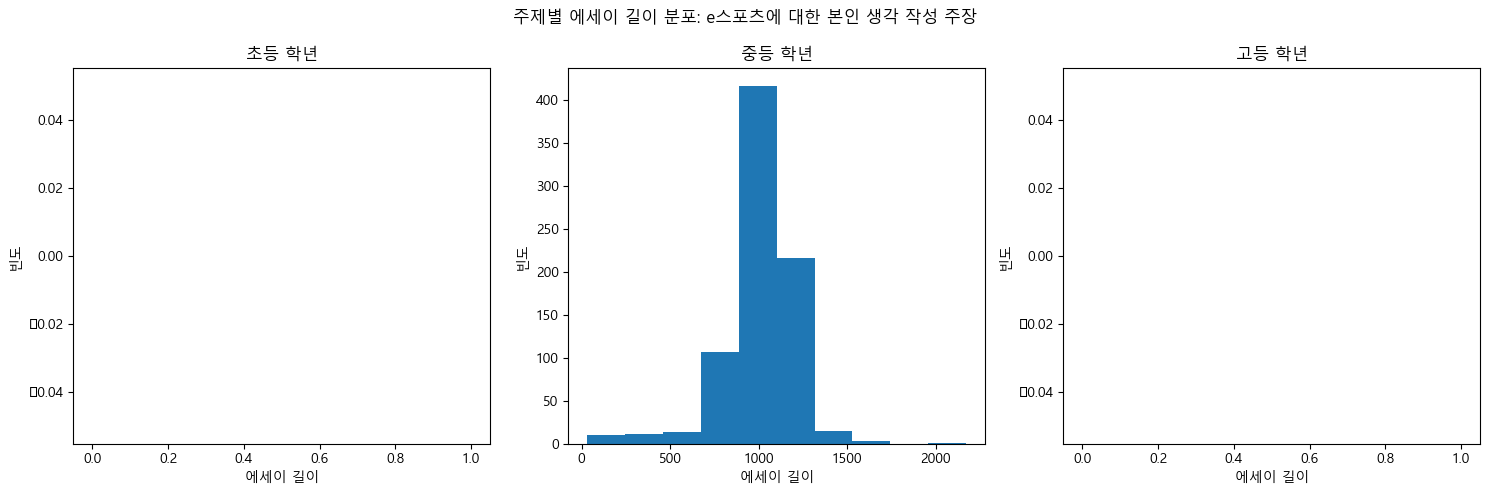

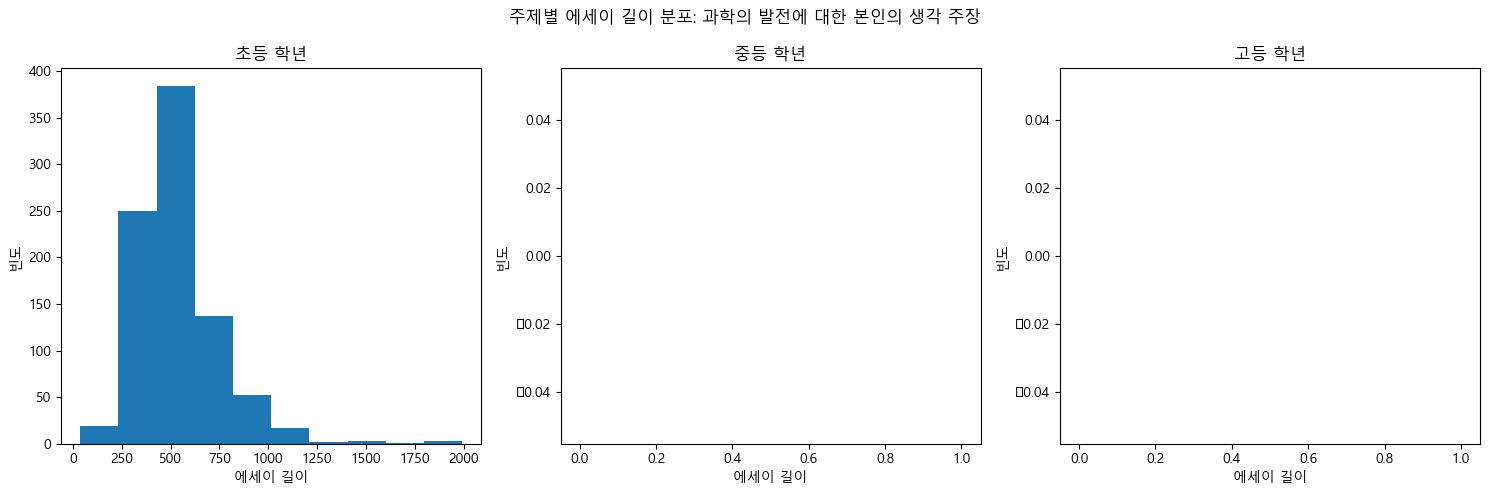

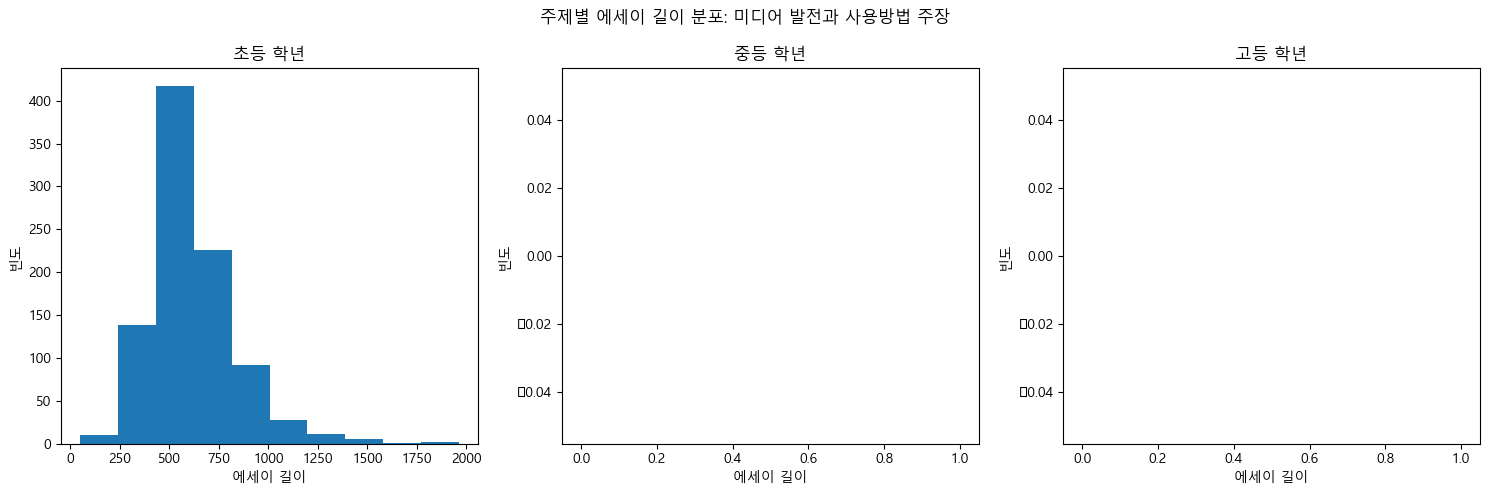

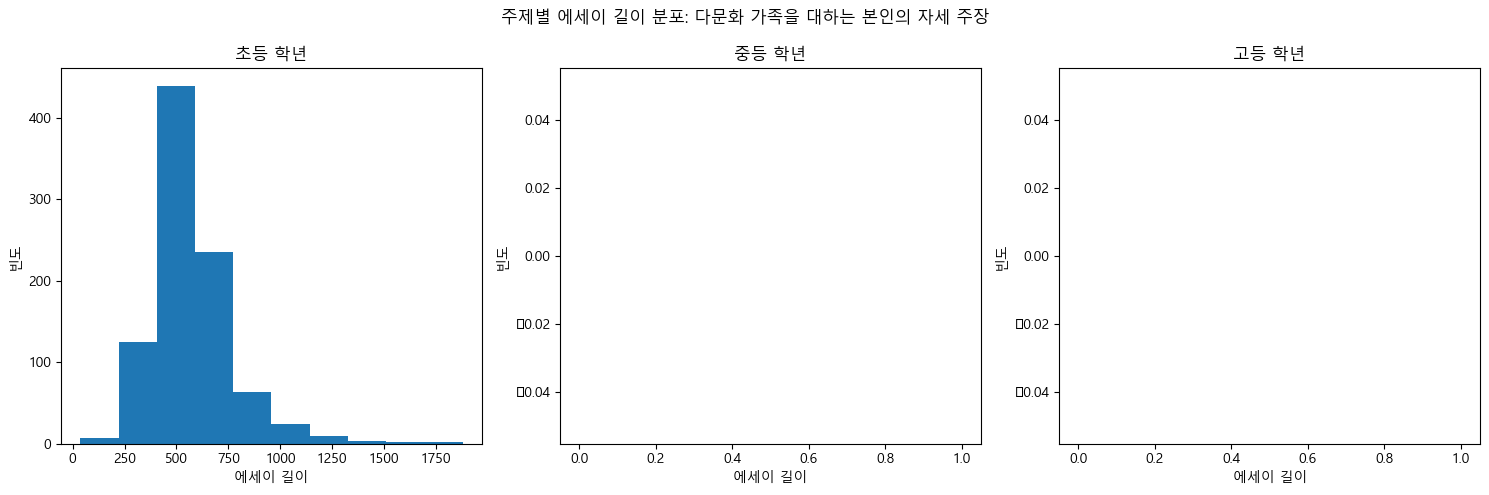

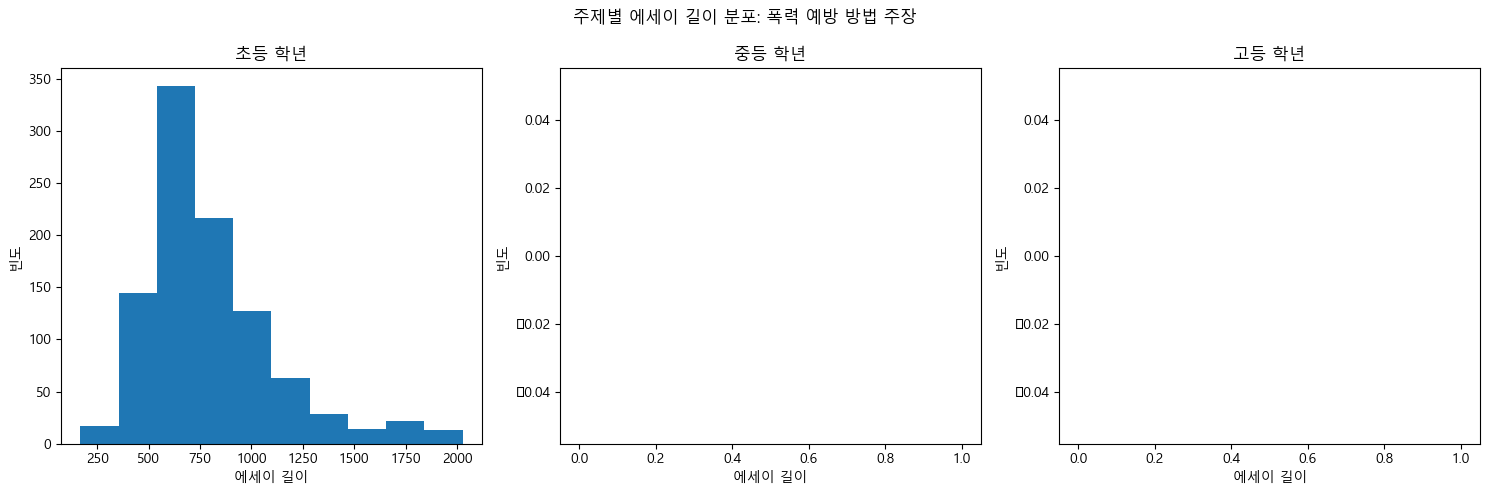

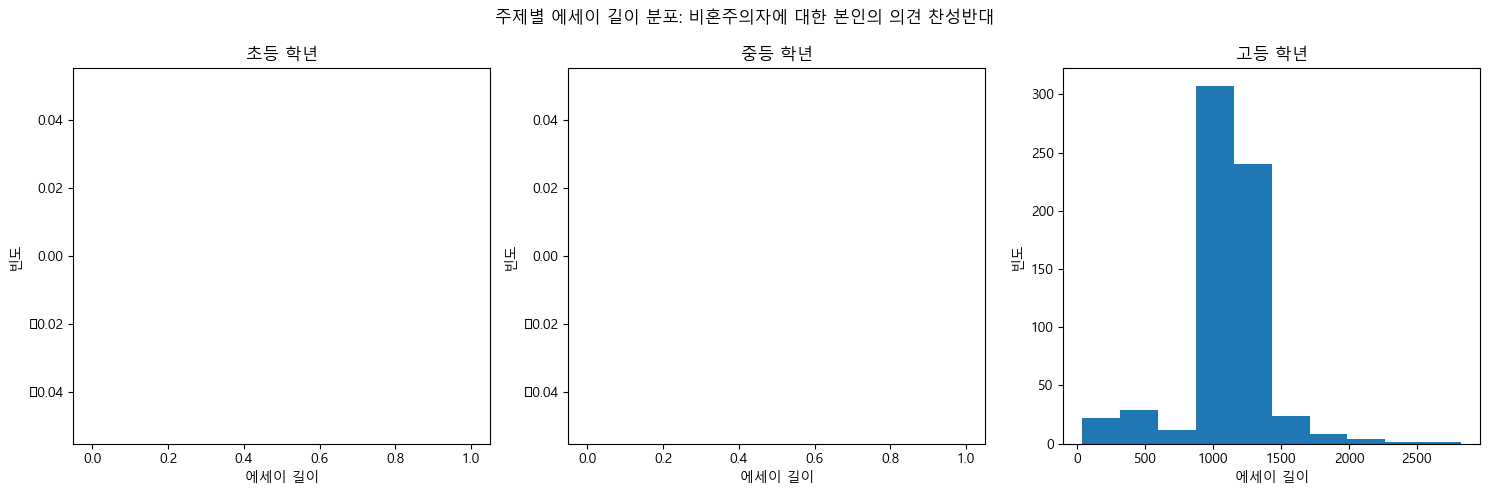

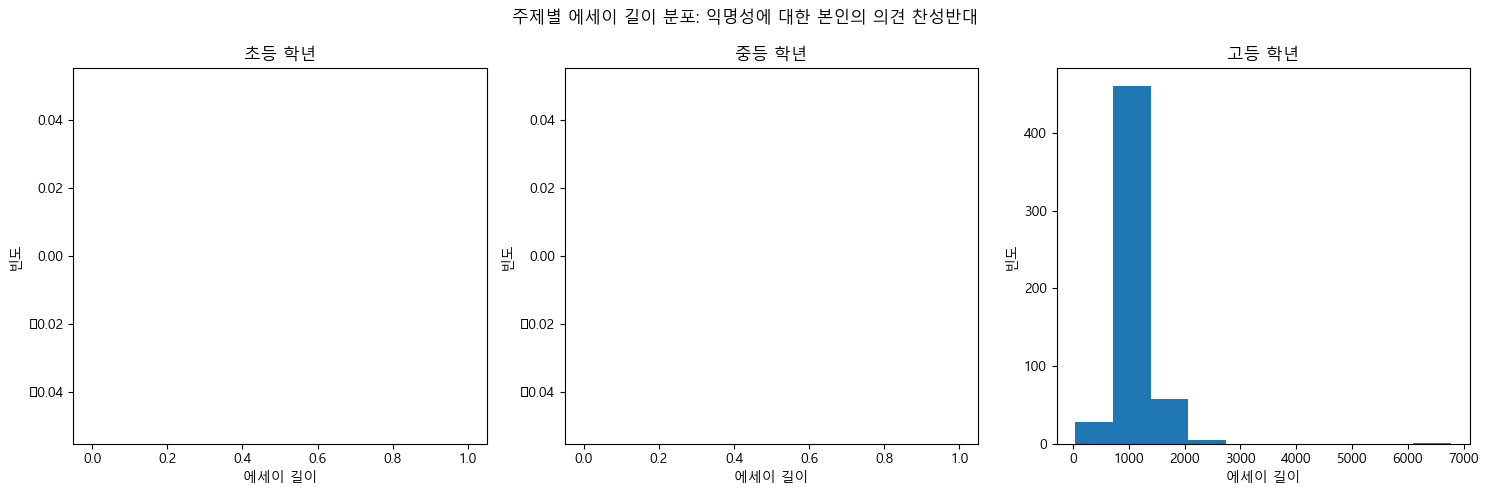

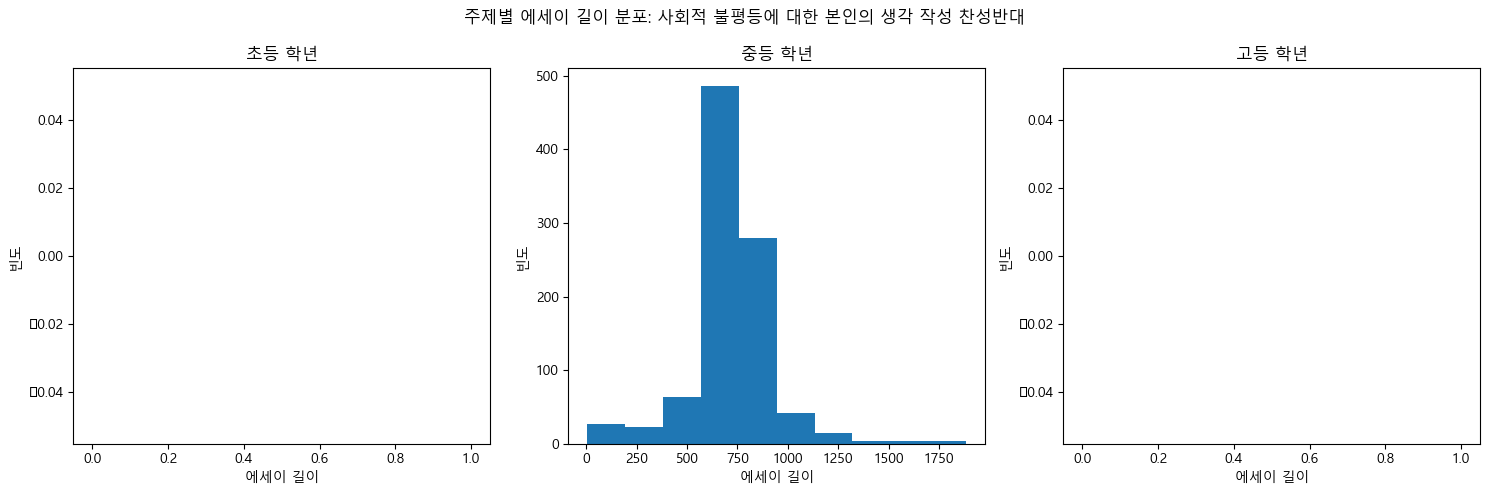

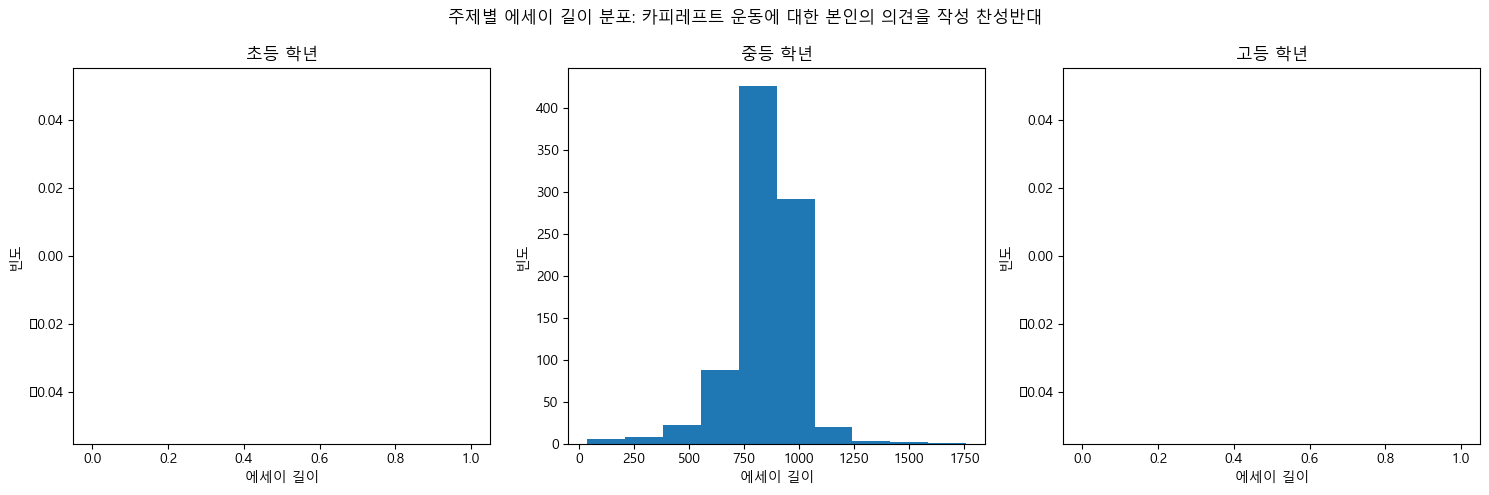

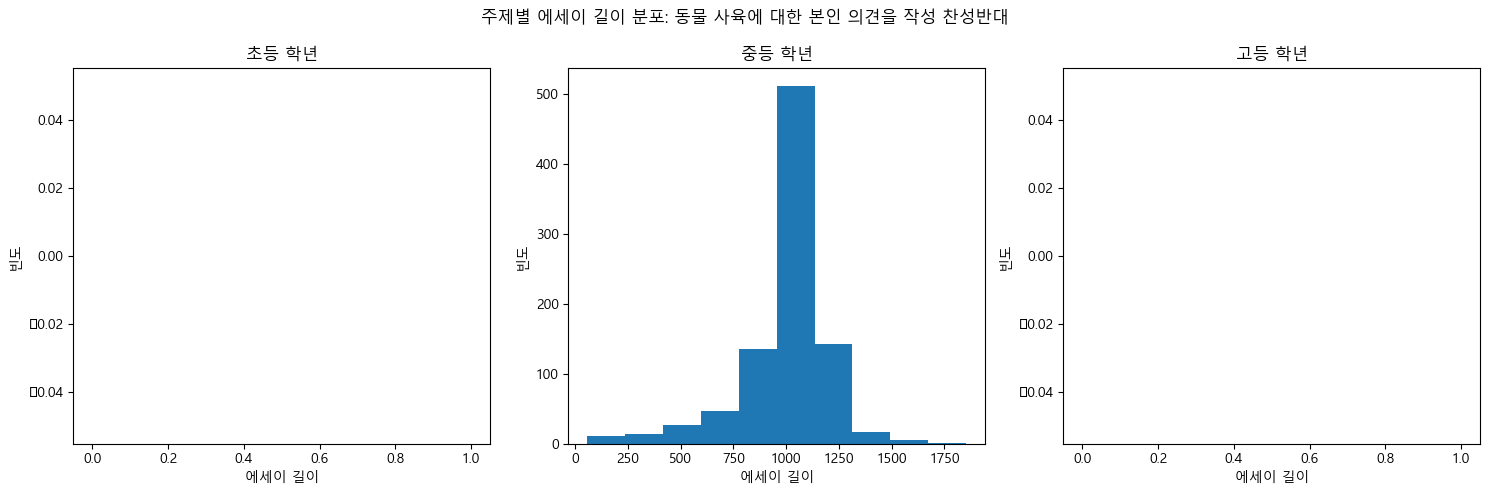

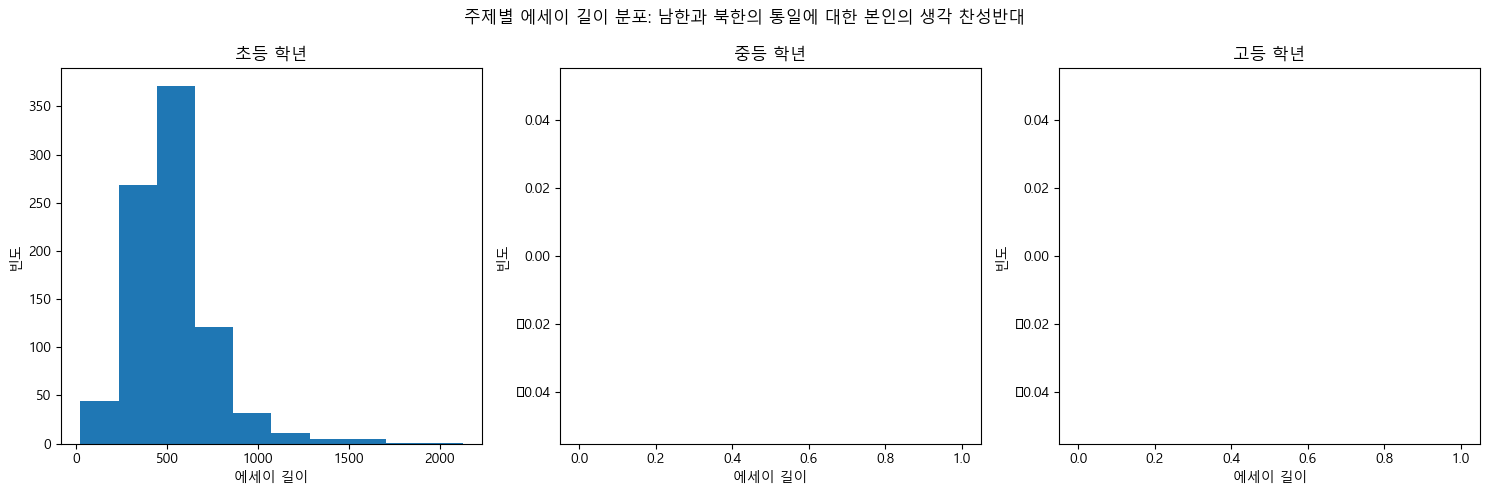

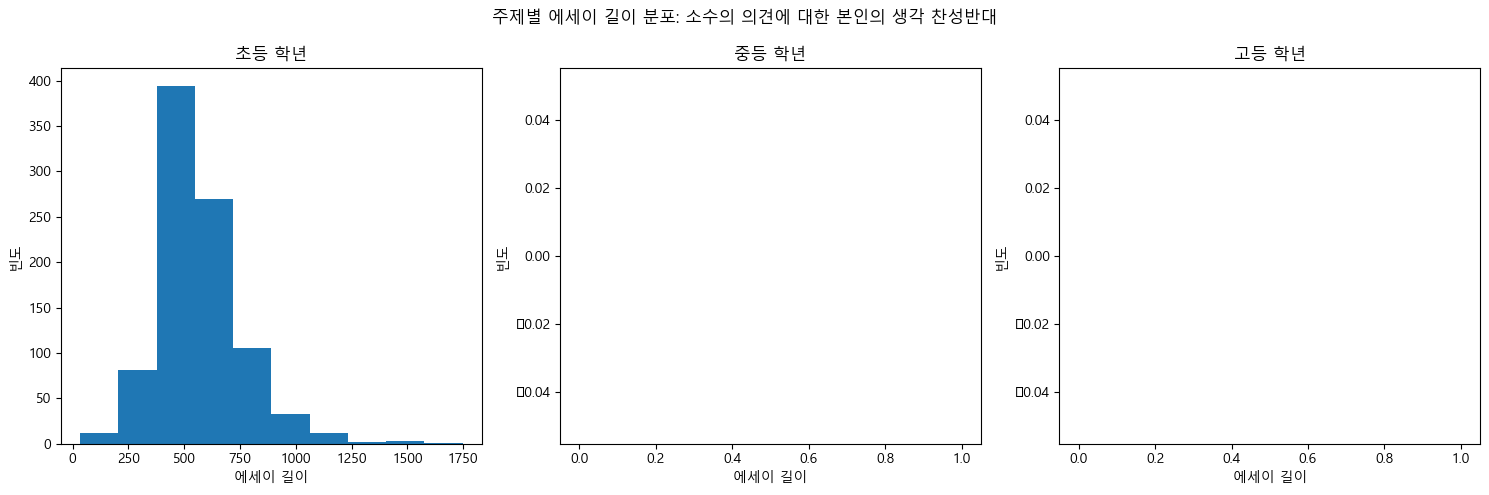

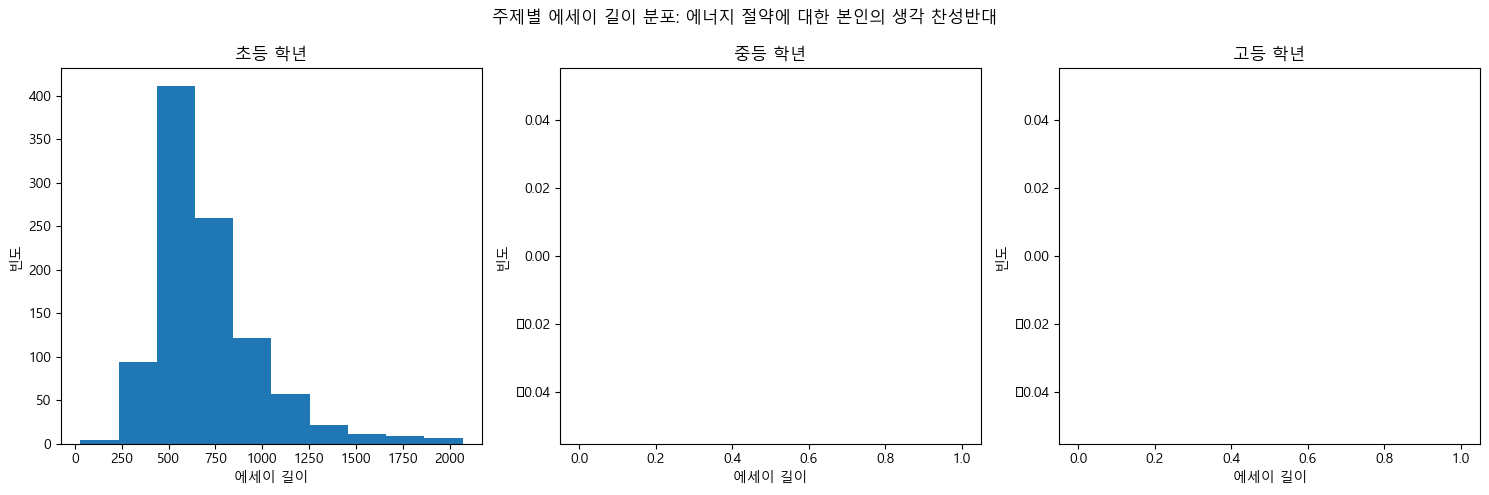

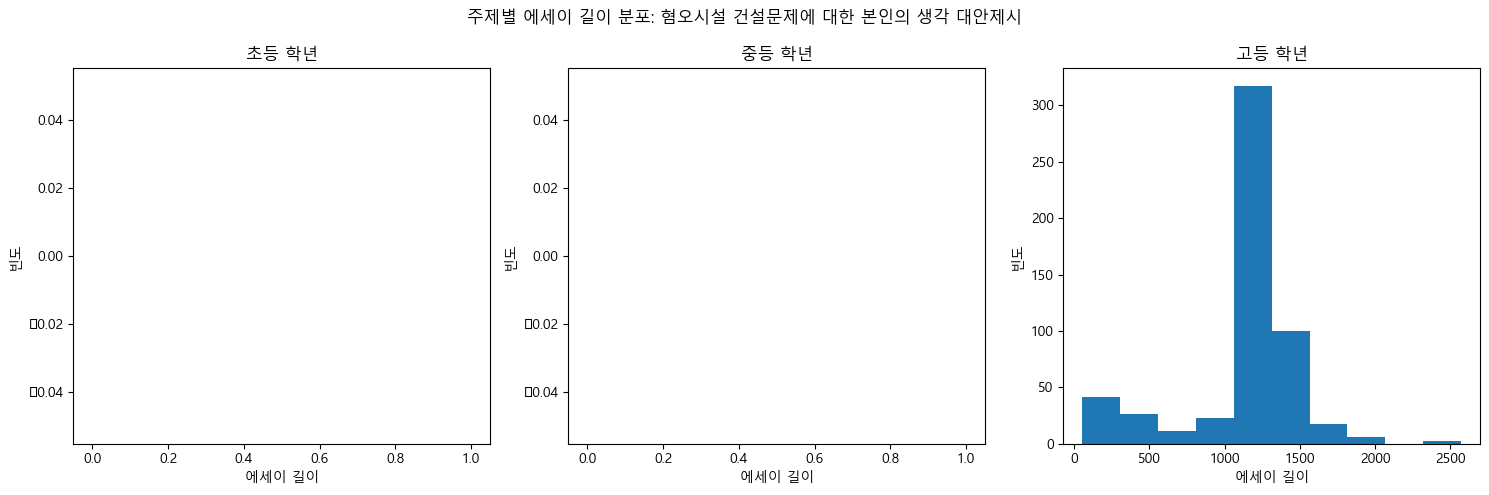

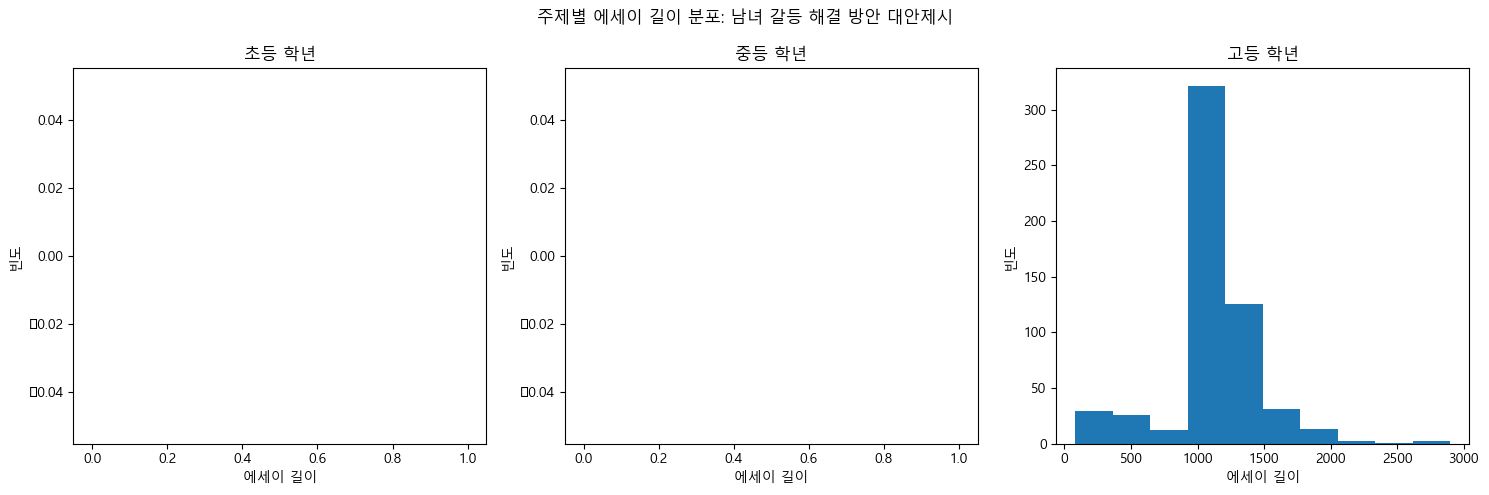

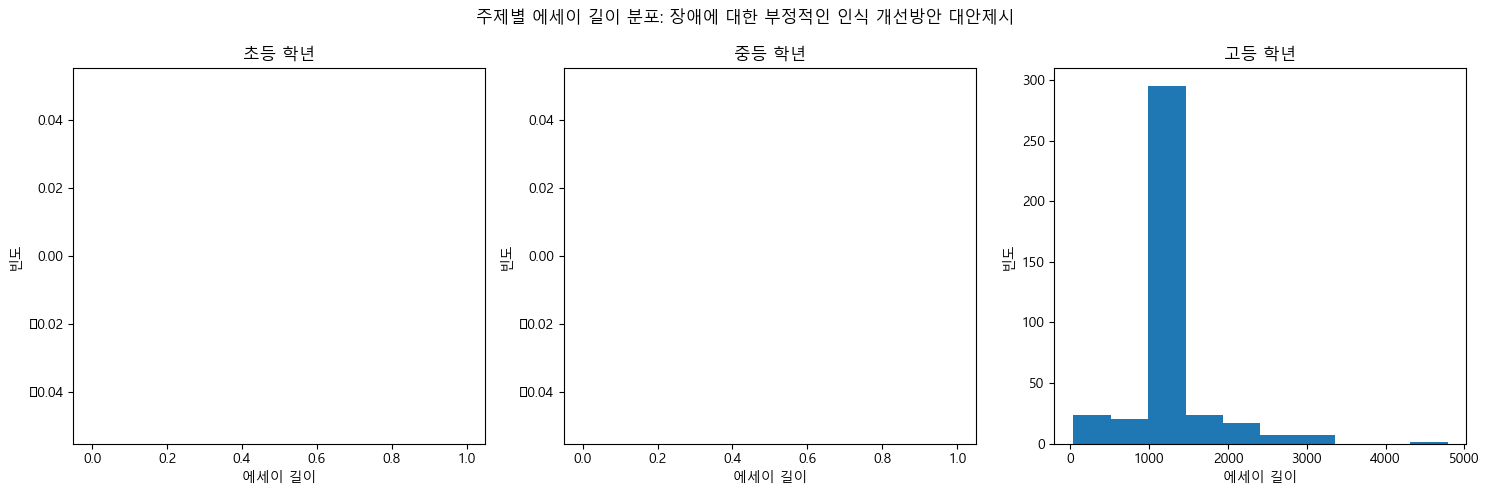

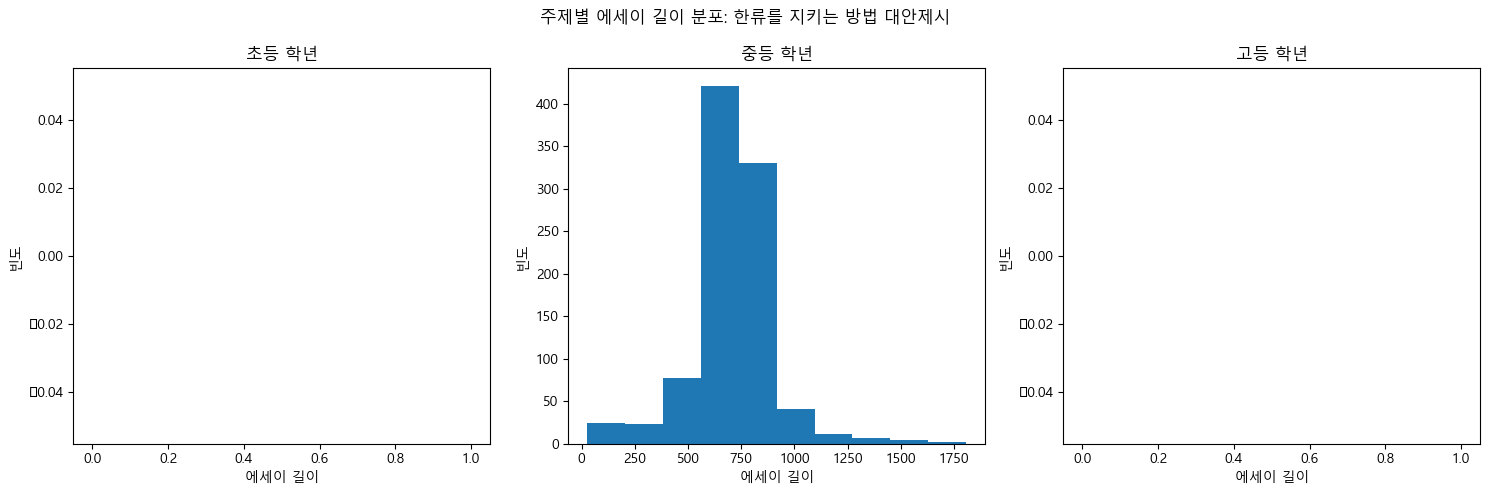

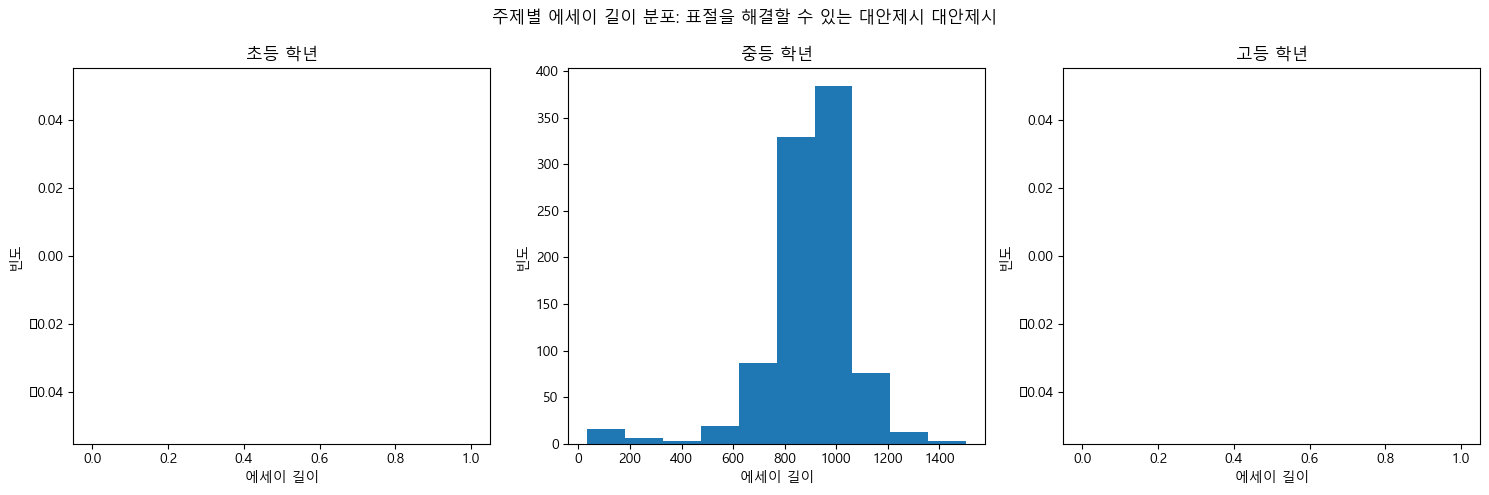

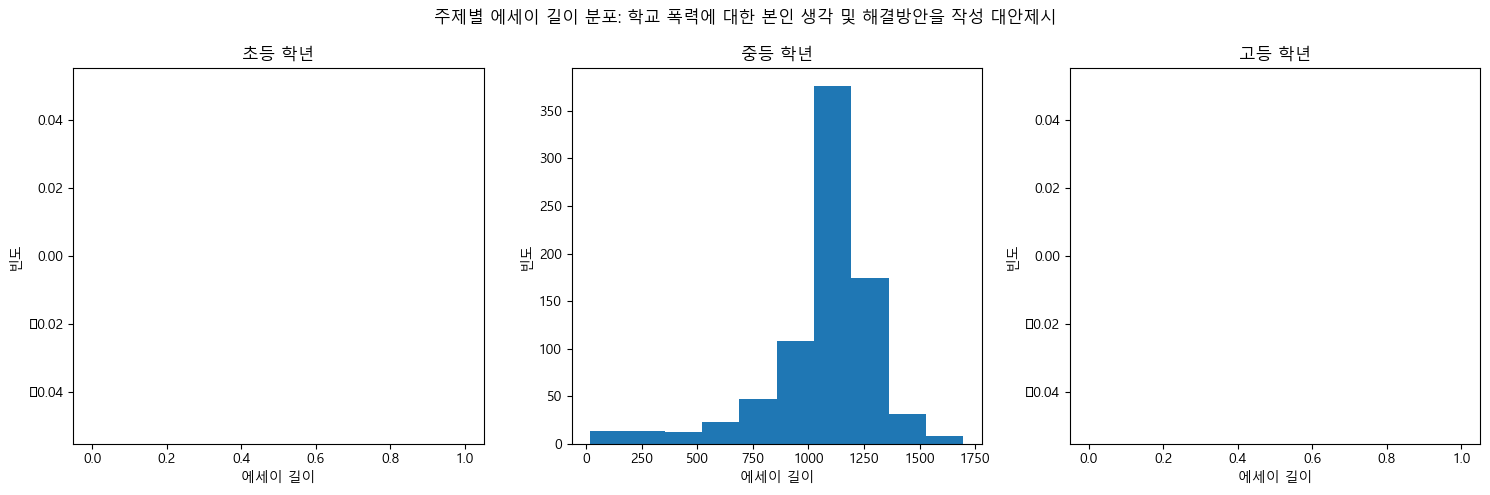

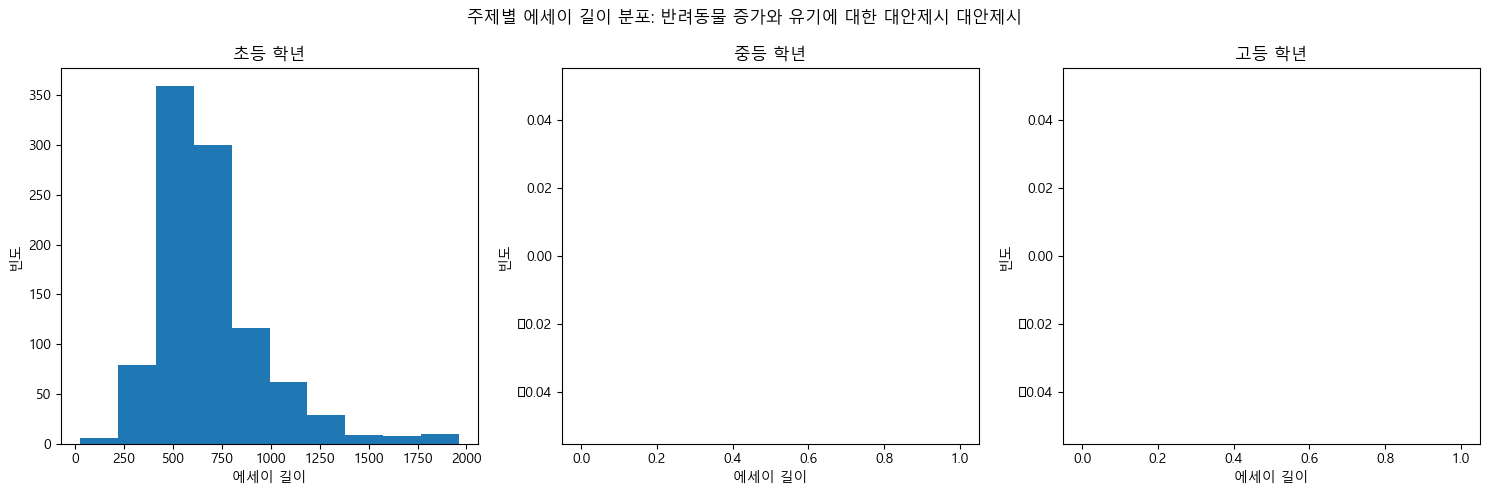

In [12]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글을 도표 위에 출력하기 위한 폰트 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 'malgun.ttf' 파일의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_prop



folder_list = ['./라벨링_글짓기', './라벨링_설명글', './라벨링_주장', './라벨링_찬성반대', './라벨링_대안제시']
#folder_list = ['./라벨링_글짓기']


# 전체 5개 폴더에 대해서 json 파일을 읽어와 보여주기
for folder_path in folder_list:

    
    length_by_grade_and_subject = {}
    
    # 폴더 내의 모든 JSON 파일을 순회(끝에가 .json인 파일들)
    for file in os.listdir(folder_path):
        if file.endswith('.json'):
            with open(os.path.join(folder_path, file), 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                subject = data['info']['essay_main_subject']
                grade_group = data['student']['student_grade_group']
                paragrapth_len = data['paragraph'][0]['paragraph_len']
                
                if subject not in length_by_grade_and_subject:
                    length_by_grade_and_subject[subject] = {"초등": [], "중등": [], "고등": []}

                # 해당 학년 그룹에 길이 추가
                length_by_grade_and_subject[subject][grade_group].append(paragrapth_len)
                    

    for subject, grades in length_by_grade_and_subject.items():
                
        # 서브플롯을 위한 설정 (2행 3열)
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
        fig.suptitle(f'주제별 에세이 길이 분포: {subject} {folder_path[6:]}')
        

        for i, (grade, lengths) in enumerate(grades.items()):
            axes[i].hist(lengths, bins=10)
            axes[i].set_title(f'{grade} 학년')
            axes[i].set_xlabel('에세이 길이')
            axes[i].set_ylabel('빈도')

        plt.tight_layout()
        plt.show()
